In [5]:
%pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [6]:
# Make the Python code more structured automatically
# %load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

# This is so I can see the entire dataframe when I print it
pd.set_option("display.max_columns", None)

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
# import statsmodels.api as sm

# to check for homoscedasticity
# import statsmodels.stats.api as sms
# from statsmodels.compat import lzip

# to check for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# to check for normality
import scipy.stats as stats

In [7]:
train = pd.read_csv("Train_dataset_(1)_(1)_(2)_(1).csv")
print(train.dtypes)
train.head()

Registration Number                int64
Annual Turnover                    int64
Cuisine                           object
City                              object
Restaurant Location               object
Opening Day of Restaurant         object
Facebook Popularity Quotient     float64
Endorsed By                       object
Instagram Popularity Quotient    float64
Fire Audit                         int64
Liquor License Obtained            int64
Situated in a Multi Complex        int64
Dedicated Parking                  int64
Open Sitting Available             int64
Resturant Tier                   float64
Restaurant Type                   object
Restaurant Theme                  object
Restaurant Zomato Rating           int64
Restaurant City Tier               int64
Order Wait Time                    int64
Staff Responsivness                int64
Value for Money                    int64
Hygiene Rating                     int64
Food Rating                        int64
Overall Restaura

,Registration Number,Annual Turnover,Cuisine,City,Restaurant Location,Opening Day of Restaurant,Facebook Popularity Quotient,Endorsed By,Instagram Popularity Quotient,Fire Audit,Liquor License Obtained,Situated in a Multi Complex,Dedicated Parking,Open Sitting Available,Resturant Tier,Restaurant Type,Restaurant Theme,Restaurant Zomato Rating,Restaurant City Tier,Order Wait Time,Staff Responsivness,Value for Money,Hygiene Rating,Food Rating,Overall Restaurant Rating,Live Music Rating,Comedy Gigs Rating,Value Deals Rating,Live Sports Rating,Ambience,Lively,Service,Comfortablility,Privacy
0,60001,42000000,"indian,irish",Bangalore,Near Business Hub,14-02-2009,84.3,Not Specific,95.8,1,1,1,0,1,2.0,Bar,Arabian,3,0,2,5,5,5,7,10.0,4.0,NaN,NaN,NaN,8.0,8,6,6,6
1,60002,50000000,"indian,irish",Indore,Near Party Hub,29-09-2008,85.4,Tier A Celebrity,85.0,1,1,1,1,0,2.0,Bar,Greek,3,0,6,6,6,7,8,9.0,NaN,4.0,NaN,NaN,5.0,7,7,3,8
2,60003,32500000,"tibetan,italian",Chennai,Near Business Hub,30-07-2011,85.0,Tier A Celebrity,68.2,1,1,1,1,0,2.0,Bar,90's,3,0,2,6,5,3,7,8.0,3.0,NaN,NaN,NaN,7.0,10,5,2,8
3,60004,110000000,"turkish,nigerian",Gurgaon,Near Party Hub,30-11-2008,85.6,Tier A Celebrity,83.6,0,1,1,1,1,1.0,Bar,Arabian,3,1,7,6,5,6,8,9.0,6.0,NaN,NaN,NaN,7.0,7,4,3,5
4,60005,20000000,"irish,belgian",Manesar,Near Party Hub,22-02-2010,NaN,Tier A Celebrity,76.8,1,1,1,1,1,NaN,Bar,Greek,3,0,10,5,6,4,8,6.0,NaN,2.0,NaN,NaN,NaN,6,2,4,6


## Rename

In [8]:
train = train.rename(columns={"Resturant Tier": "Restaurant Tier"})
train = train.rename(columns={"Staff Responsivness": "Staff Responsiveness"})
train = train.rename(columns={"Comfortablility": "Comfortability"})
train.head()

,Registration Number,Annual Turnover,Cuisine,City,Restaurant Location,Opening Day of Restaurant,Facebook Popularity Quotient,Endorsed By,Instagram Popularity Quotient,Fire Audit,Liquor License Obtained,Situated in a Multi Complex,Dedicated Parking,Open Sitting Available,Restaurant Tier,Restaurant Type,Restaurant Theme,Restaurant Zomato Rating,Restaurant City Tier,Order Wait Time,Staff Responsiveness,Value for Money,Hygiene Rating,Food Rating,Overall Restaurant Rating,Live Music Rating,Comedy Gigs Rating,Value Deals Rating,Live Sports Rating,Ambience,Lively,Service,Comfortability,Privacy
0,60001,42000000,"indian,irish",Bangalore,Near Business Hub,14-02-2009,84.3,Not Specific,95.8,1,1,1,0,1,2.0,Bar,Arabian,3,0,2,5,5,5,7,10.0,4.0,NaN,NaN,NaN,8.0,8,6,6,6
1,60002,50000000,"indian,irish",Indore,Near Party Hub,29-09-2008,85.4,Tier A Celebrity,85.0,1,1,1,1,0,2.0,Bar,Greek,3,0,6,6,6,7,8,9.0,NaN,4.0,NaN,NaN,5.0,7,7,3,8
2,60003,32500000,"tibetan,italian",Chennai,Near Business Hub,30-07-2011,85.0,Tier A Celebrity,68.2,1,1,1,1,0,2.0,Bar,90's,3,0,2,6,5,3,7,8.0,3.0,NaN,NaN,NaN,7.0,10,5,2,8
3,60004,110000000,"turkish,nigerian",Gurgaon,Near Party Hub,30-11-2008,85.6,Tier A Celebrity,83.6,0,1,1,1,1,1.0,Bar,Arabian,3,1,7,6,5,6,8,9.0,6.0,NaN,NaN,NaN,7.0,7,4,3,5
4,60005,20000000,"irish,belgian",Manesar,Near Party Hub,22-02-2010,NaN,Tier A Celebrity,76.8,1,1,1,1,1,NaN,Bar,Greek,3,0,10,5,6,4,8,6.0,NaN,2.0,NaN,NaN,NaN,6,2,4,6


### Observations:
+ The spelling on columns was incorrect. This will spell them correctly so the code looks a little neater

In [9]:
test = pd.read_csv("Test_dataset_(1)_(1)_(2)_(1).csv")
test.head()

,Registration Number,Cuisine,City,Restaurant Location,Opening Day of Restaurant,Facebook Popularity Quotient,Endoresed By,Instagram Popularity Quotient,Fire Audit,Liquor License Obtained,Situated in a Multi Complex,Dedicated Parking,Open Sitting Available,Resturant Tier,Restaurant Type,Restaurant Theme,Restaurant Zomato Rating,Restaurant City Tier,Order Wait Time,Staff Responsivness,Value for Money,Hygiene Rating,Food Rating,Overall Restaurant Rating,Live Music Rating,Comedy Gigs Rating,Value Deals Rating,Live Sports Rating,Ambience,Lively,Service,Comfortablility,Privacy
0,20001,"tibetan,italian",Bangalore,Near Business Hub,13-07-2010,78.00,Tier A Celebrity,69.00,1,1,1,1,0,2,Bar,Greek,3,0,10,5,3,5,8,6.0,NaN,2.0,NaN,NaN,5,2,2,6,0
1,20002,"tibetan,italian",Hyderabad,Near Party Hub,05-09-2011,89.17,Not Specific,96.00,1,1,1,1,1,2,Bar,Nature,4,0,10,4,5,6,8,9.0,3.0,NaN,NaN,6.0,7,8,5,1,8
2,20003,"algerian,belgian",Hyderabad,Near Party Hub,12-04-2011,84.00,Not Specific,86.00,1,1,1,0,1,2,Bar,Greek,2,0,6,5,5,6,9,6.0,3.0,NaN,NaN,NaN,9,7,5,1,5
3,20004,"tibetan,greek",-1,Near Party Hub,16-01-2005,79.38,Not Specific,74.40,0,1,1,1,1,2,Gastro Bar,90's,3,0,10,5,5,5,9,9.0,6.0,NaN,NaN,NaN,6,7,6,4,7
4,20005,"cuban,british",Pune,Near Party Hub,10-11-2008,84.67,Not Specific,86.46,1,1,1,0,0,1,Bar,Mise En,4,1,7,5,5,7,8,NaN,NaN,NaN,NaN,NaN,4,4,7,7,3


## Rename

In [10]:
test = test.rename(columns={"Endoresed By": "Endorsed By"})
test = test.rename(columns={"Resturant Tier": "Restaurant Tier"})
test = test.rename(columns={"Staff Responsivness": "Staff Responsiveness"})
test = test.rename(columns={"Comfortablility": "Comfortability"})
test.head()

,Registration Number,Cuisine,City,Restaurant Location,Opening Day of Restaurant,Facebook Popularity Quotient,Endorsed By,Instagram Popularity Quotient,Fire Audit,Liquor License Obtained,Situated in a Multi Complex,Dedicated Parking,Open Sitting Available,Restaurant Tier,Restaurant Type,Restaurant Theme,Restaurant Zomato Rating,Restaurant City Tier,Order Wait Time,Staff Responsiveness,Value for Money,Hygiene Rating,Food Rating,Overall Restaurant Rating,Live Music Rating,Comedy Gigs Rating,Value Deals Rating,Live Sports Rating,Ambience,Lively,Service,Comfortability,Privacy
0,20001,"tibetan,italian",Bangalore,Near Business Hub,13-07-2010,78.00,Tier A Celebrity,69.00,1,1,1,1,0,2,Bar,Greek,3,0,10,5,3,5,8,6.0,NaN,2.0,NaN,NaN,5,2,2,6,0
1,20002,"tibetan,italian",Hyderabad,Near Party Hub,05-09-2011,89.17,Not Specific,96.00,1,1,1,1,1,2,Bar,Nature,4,0,10,4,5,6,8,9.0,3.0,NaN,NaN,6.0,7,8,5,1,8
2,20003,"algerian,belgian",Hyderabad,Near Party Hub,12-04-2011,84.00,Not Specific,86.00,1,1,1,0,1,2,Bar,Greek,2,0,6,5,5,6,9,6.0,3.0,NaN,NaN,NaN,9,7,5,1,5
3,20004,"tibetan,greek",-1,Near Party Hub,16-01-2005,79.38,Not Specific,74.40,0,1,1,1,1,2,Gastro Bar,90's,3,0,10,5,5,5,9,9.0,6.0,NaN,NaN,NaN,6,7,6,4,7
4,20005,"cuban,british",Pune,Near Party Hub,10-11-2008,84.67,Not Specific,86.46,1,1,1,0,0,1,Bar,Mise En,4,1,7,5,5,7,8,NaN,NaN,NaN,NaN,NaN,4,4,7,7,3


### Observations:
+ The spelling on columns was incorrect. This will spell them correctly so the code looks a little neater

In [11]:
test.dtypes

Registration Number                int64
Cuisine                           object
City                              object
Restaurant Location               object
Opening Day of Restaurant         object
Facebook Popularity Quotient     float64
Endorsed By                       object
Instagram Popularity Quotient    float64
Fire Audit                         int64
Liquor License Obtained            int64
Situated in a Multi Complex        int64
Dedicated Parking                  int64
Open Sitting Available             int64
Restaurant Tier                    int64
Restaurant Type                   object
Restaurant Theme                  object
Restaurant Zomato Rating           int64
Restaurant City Tier               int64
Order Wait Time                    int64
Staff Responsiveness               int64
Value for Money                    int64
Hygiene Rating                     int64
Food Rating                        int64
Overall Restaurant Rating        float64
Live Music Ratin

## To Datetime

In [12]:
# Changes the code from object to date time so that i may manipulate it better later
test["Opening Day of Restaurant"] = pd.to_datetime(test["Opening Day of Restaurant"])
test["Opening Day of Restaurant_Day"] = test[
    "Opening Day of Restaurant"
].dt.day  # creates new column for day
test["Opening Day of Restaurant_Month"] = test[
    "Opening Day of Restaurant"
].dt.month  # creates new column for month
test["Opening Day of Restaurant_Year"] = test[
    "Opening Day of Restaurant"
].dt.year  # creates new column for year

test.drop("Opening Day of Restaurant", axis=1, inplace=True)  # drops original column

object_cols_test = test.select_dtypes(include="object").columns.tolist()
test[object_cols_test] = test.select_dtypes(include="object").astype(
    "category"
)  # change all object types to category types
test.dtypes

/var/folders/dy/l71schps16q1nz5z1g20vglc0000gq/T/ipykernel_3690/94927784.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  test["Opening Day of Restaurant"] = pd.to_datetime(test["Opening Day of Restaurant"])


Registration Number                   int64
Cuisine                            category
City                               category
Restaurant Location                category
Facebook Popularity Quotient        float64
Endorsed By                        category
Instagram Popularity Quotient       float64
Fire Audit                            int64
Liquor License Obtained               int64
Situated in a Multi Complex           int64
Dedicated Parking                     int64
Open Sitting Available                int64
Restaurant Tier                       int64
Restaurant Type                    category
Restaurant Theme                   category
Restaurant Zomato Rating              int64
Restaurant City Tier                  int64
Order Wait Time                       int64
Staff Responsiveness                  int64
Value for Money                       int64
Hygiene Rating                        int64
Food Rating                           int64
Overall Restaurant Rating       

In [13]:
train.isnull().sum()

Registration Number                 0
Annual Turnover                     0
Cuisine                             0
City                                0
Restaurant Location                 0
Opening Day of Restaurant           0
Facebook Popularity Quotient       99
Endorsed By                         0
Instagram Popularity Quotient      56
Fire Audit                          0
Liquor License Obtained             0
Situated in a Multi Complex         0
Dedicated Parking                   0
Open Sitting Available              0
Restaurant Tier                    49
Restaurant Type                     0
Restaurant Theme                    0
Restaurant Zomato Rating            0
Restaurant City Tier                0
Order Wait Time                     0
Staff Responsiveness                0
Value for Money                     0
Hygiene Rating                      0
Food Rating                         0
Overall Restaurant Rating         212
Live Music Rating                 765
Comedy Gigs 

In [14]:
train["Live Sports Rating"].fillna(0)
train["Value Deals Rating"].fillna(0)
train["Comedy Gigs Rating"].fillna(0)
train["Live Music Rating"].fillna(0)

0       4.0
1       0.0
2       3.0
3       6.0
4       0.0
       ... 
3488    5.0
3489    4.0
3490    0.0
3491    3.0
3492    1.0
Name: Live Music Rating, Length: 3493, dtype: float64

In [15]:
test.isnull().sum()

Registration Number                  0
Cuisine                              0
City                                 0
Restaurant Location                  0
Facebook Popularity Quotient         0
Endorsed By                          0
Instagram Popularity Quotient        0
Fire Audit                           0
Liquor License Obtained              0
Situated in a Multi Complex          0
Dedicated Parking                    0
Open Sitting Available               0
Restaurant Tier                      0
Restaurant Type                      0
Restaurant Theme                     0
Restaurant Zomato Rating             0
Restaurant City Tier                 0
Order Wait Time                      0
Staff Responsiveness                 0
Value for Money                      0
Hygiene Rating                       0
Food Rating                          0
Overall Restaurant Rating           34
Live Music Rating                  102
Comedy Gigs Rating                 370
Value Deals Rating       

In [16]:
test.dtypes

Registration Number                   int64
Cuisine                            category
City                               category
Restaurant Location                category
Facebook Popularity Quotient        float64
Endorsed By                        category
Instagram Popularity Quotient       float64
Fire Audit                            int64
Liquor License Obtained               int64
Situated in a Multi Complex           int64
Dedicated Parking                     int64
Open Sitting Available                int64
Restaurant Tier                       int64
Restaurant Type                    category
Restaurant Theme                   category
Restaurant Zomato Rating              int64
Restaurant City Tier                  int64
Order Wait Time                       int64
Staff Responsiveness                  int64
Value for Money                       int64
Hygiene Rating                        int64
Food Rating                           int64
Overall Restaurant Rating       

In [17]:
test["Live Sports Rating"].fillna(0)
test["Value Deals Rating"].fillna(0)
test["Comedy Gigs Rating"].fillna(0)
test["Live Music Rating"].fillna(0)

0      0.0
1      3.0
2      3.0
3      6.0
4      0.0
      ... 
495    5.0
496    3.0
497    5.0
498    6.0
499    5.0
Name: Live Music Rating, Length: 500, dtype: float64

In [18]:
numeric_cols_test = test.select_dtypes(
    include=np.number
).columns.tolist()  # creates list of columns that are numeric
# changes all null values to their respective columns medians
test[numeric_cols_test] = test[numeric_cols_test].apply(
    lambda x: x.fillna(x.median()), axis=0
)


category_cols_test = test.select_dtypes(
    include="category"
).columns.tolist()  # creates list of columns that are categorical
# changes all null values to the mode of the respective columns
test[category_cols_test] = test[category_cols_test].apply(
    lambda x: x.fillna(x.value_counts().index[0]), axis=0
)
category_cols_test

['Cuisine',
 'City',
 'Restaurant Location',
 'Endorsed By',
 'Restaurant Type',
 'Restaurant Theme']

In [19]:
# Changes the code from object to date time so that i may manipulate it better later
train["Opening Day of Restaurant"] = pd.to_datetime(train["Opening Day of Restaurant"])
train["Opening Day of Restaurant_Day"] = train[
    "Opening Day of Restaurant"
].dt.day  # creates a new column for day opened
train["Opening Day of Restaurant_Month"] = train[
    "Opening Day of Restaurant"
].dt.month  # creates a new column for month opened
train["Opening Day of Restaurant_Year"] = train[
    "Opening Day of Restaurant"
].dt.year  # creates a new column for year opened

train.drop(
    "Opening Day of Restaurant", axis=1, inplace=True
)  # drops original column out of dataset

object_cols_train = train.select_dtypes(
    include="object"
).columns.tolist()  # creates list of all object type columns
train[object_cols_train] = train.select_dtypes(include="object").astype(
    "category"
)  # changes all object type columns to categorical

numeric_cols_train = train.select_dtypes(
    include=np.number
).columns.tolist()  # creates list of numerical columns
# fills all null values for numerical columns with their respective medians
train[numeric_cols_train] = train[numeric_cols_train].apply(
    lambda x: x.fillna(x.median()), axis=0
)

category_cols_train = train.select_dtypes(
    include="category"
).columns.tolist()  # creates list of categorical columns
# fills all null values for categorical columns with their respectives modes
train[category_cols_train] = train[category_cols_train].apply(
    lambda x: x.fillna(x.value_counts().index[0]), axis=0
)
category_cols_train

/var/folders/dy/l71schps16q1nz5z1g20vglc0000gq/T/ipykernel_3690/2013537943.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  train["Opening Day of Restaurant"] = pd.to_datetime(train["Opening Day of Restaurant"])


['Cuisine',
 'City',
 'Restaurant Location',
 'Endorsed By',
 'Restaurant Type',
 'Restaurant Theme']

In [20]:
numeric_cols_train

['Registration Number',
 'Annual Turnover',
 'Facebook Popularity Quotient',
 'Instagram Popularity Quotient',
 'Fire Audit',
 'Liquor License Obtained',
 'Situated in a Multi Complex',
 'Dedicated Parking',
 'Open Sitting Available',
 'Restaurant Tier',
 'Restaurant Zomato Rating',
 'Restaurant City Tier',
 'Order Wait Time',
 'Staff Responsiveness',
 'Value for Money',
 'Hygiene Rating',
 'Food Rating',
 'Overall Restaurant Rating',
 'Live Music Rating',
 'Comedy Gigs Rating',
 'Value Deals Rating',
 'Live Sports Rating',
 'Ambience',
 'Lively',
 'Service',
 'Comfortability',
 'Privacy',
 'Opening Day of Restaurant_Day',
 'Opening Day of Restaurant_Month',
 'Opening Day of Restaurant_Year']

## Outliers

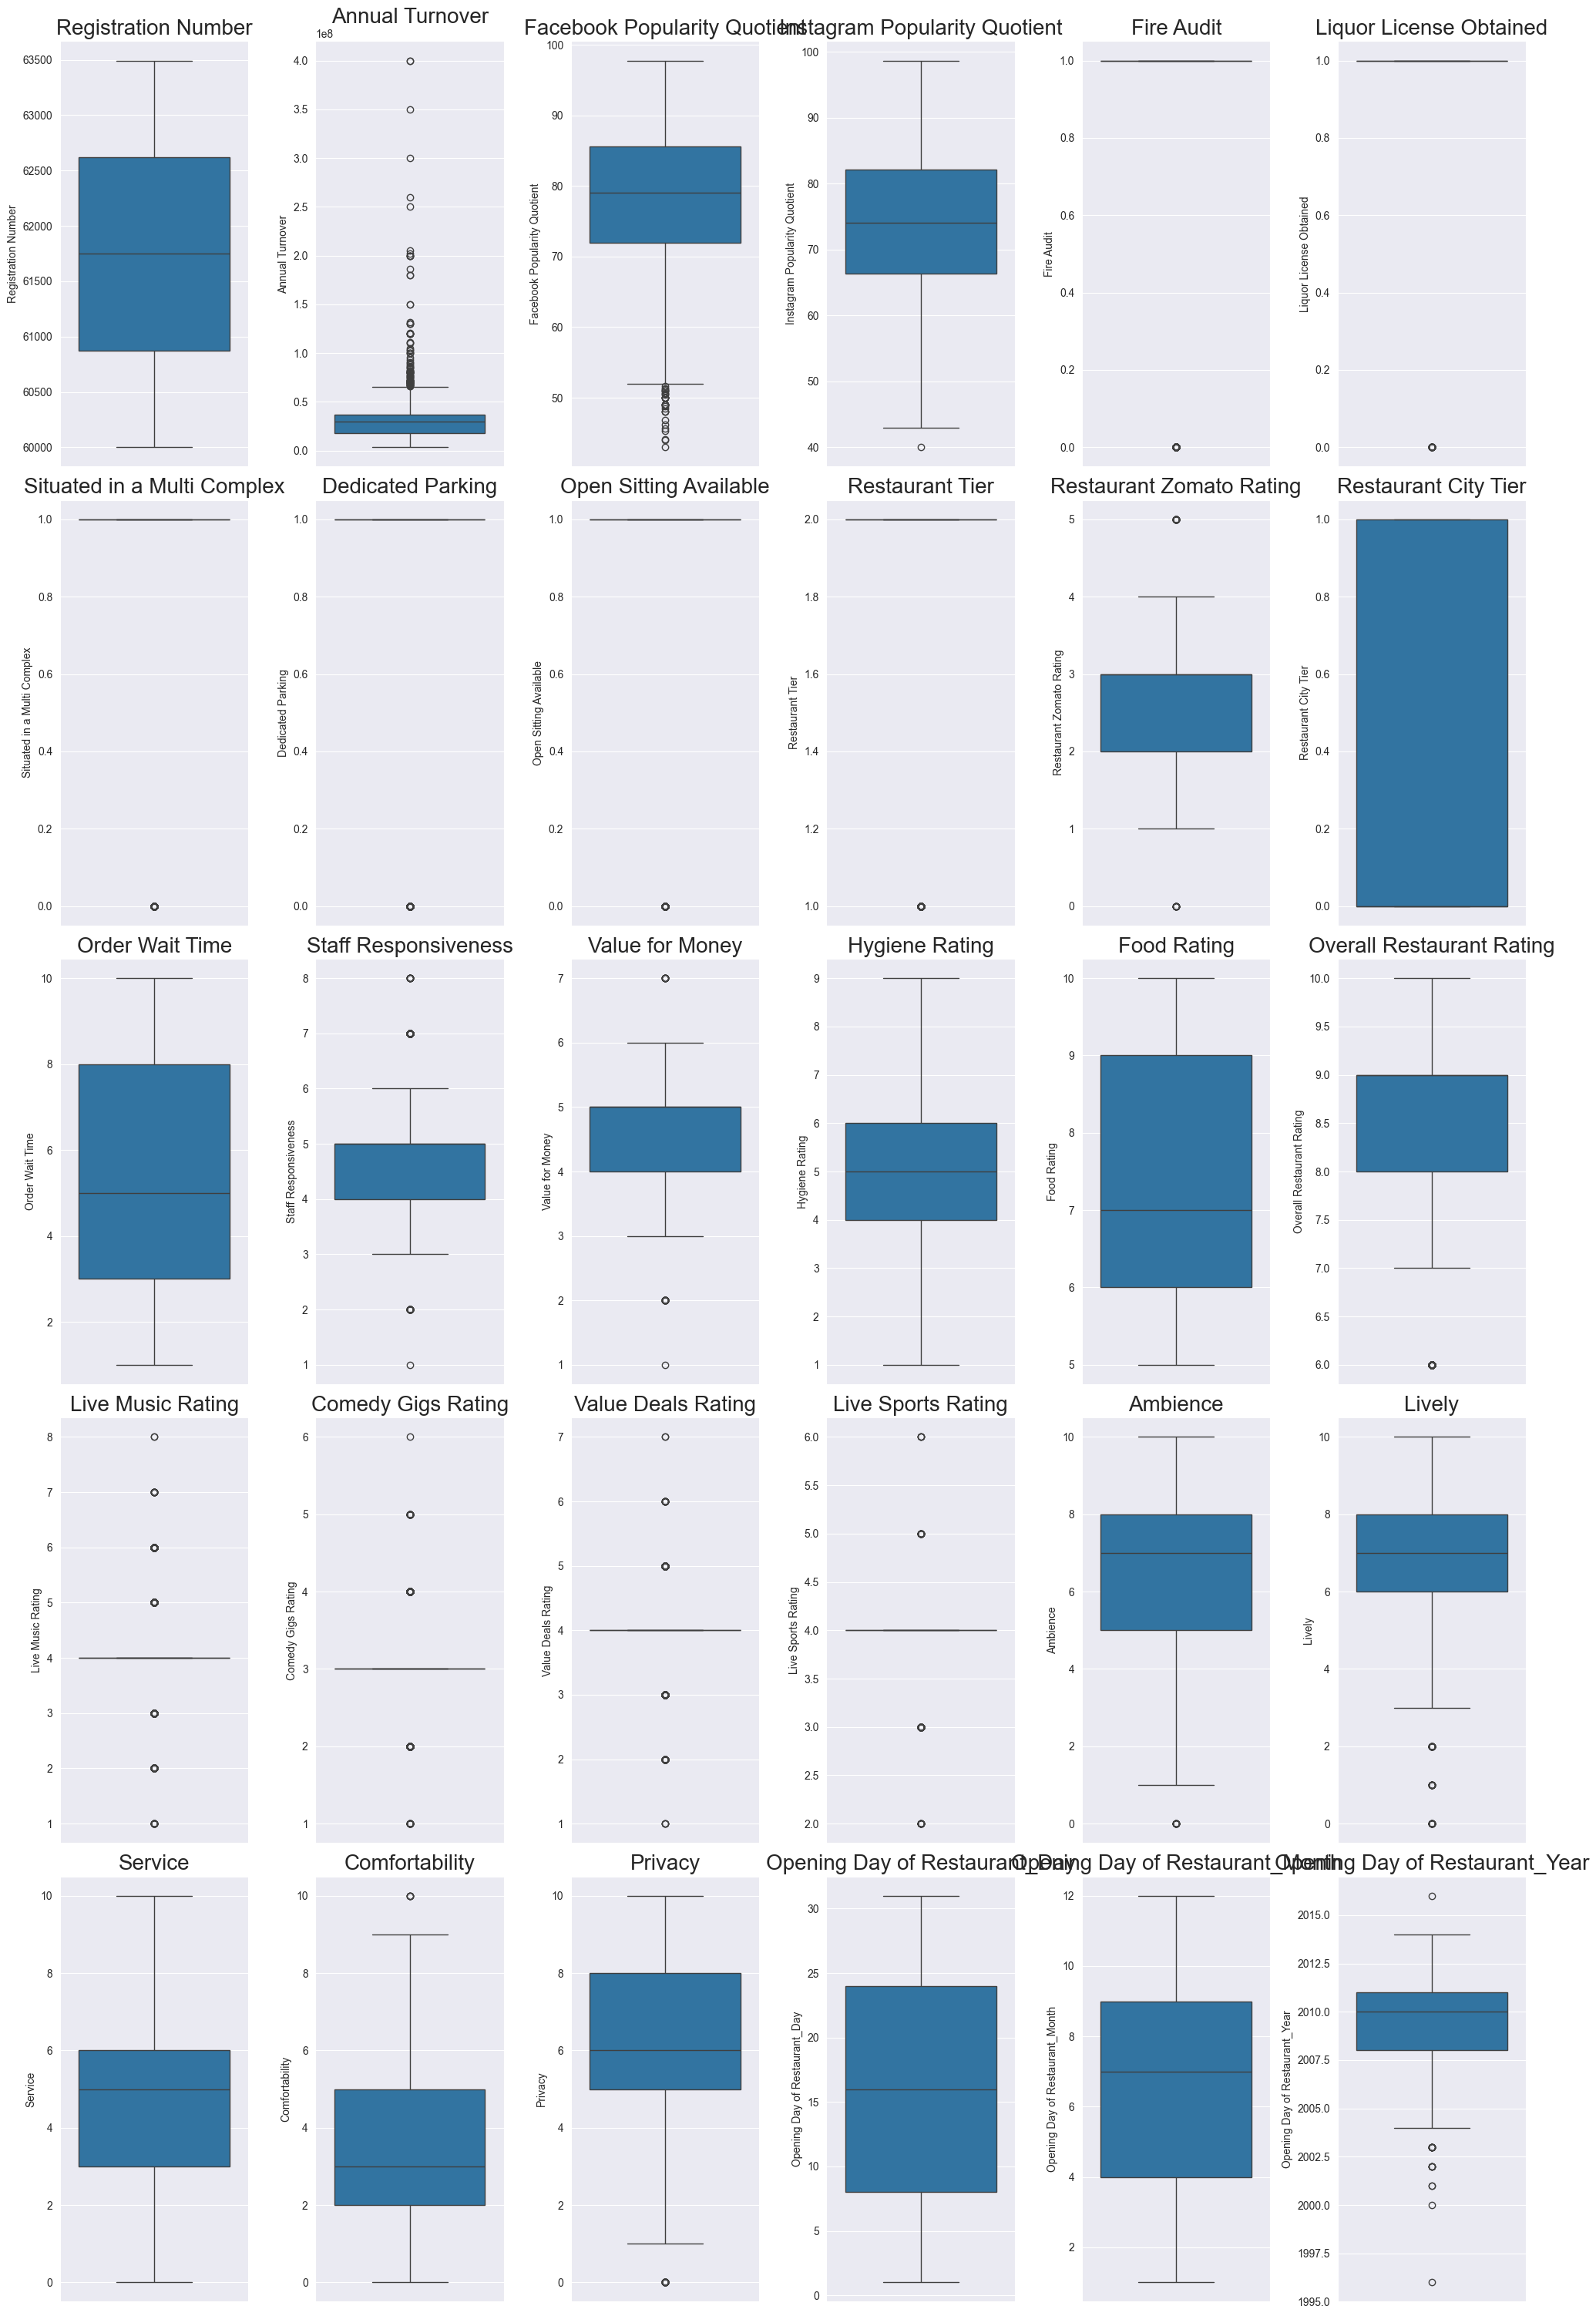

In [21]:
numeric_cols_train = train.select_dtypes(
    include=np.number
).columns.tolist()  # creates list of numerical columns

plt.figure(figsize=(20, 30))

# print boxplots of all numerical values in training data
for i, variable in enumerate(numeric_cols_train):
    plt.subplot(5, 6, i + 1)
    sns.boxplot(data=train, y=variable, whis=1.5)
    plt.tight_layout()
    plt.title(variable, fontsize=20)

plt.show()

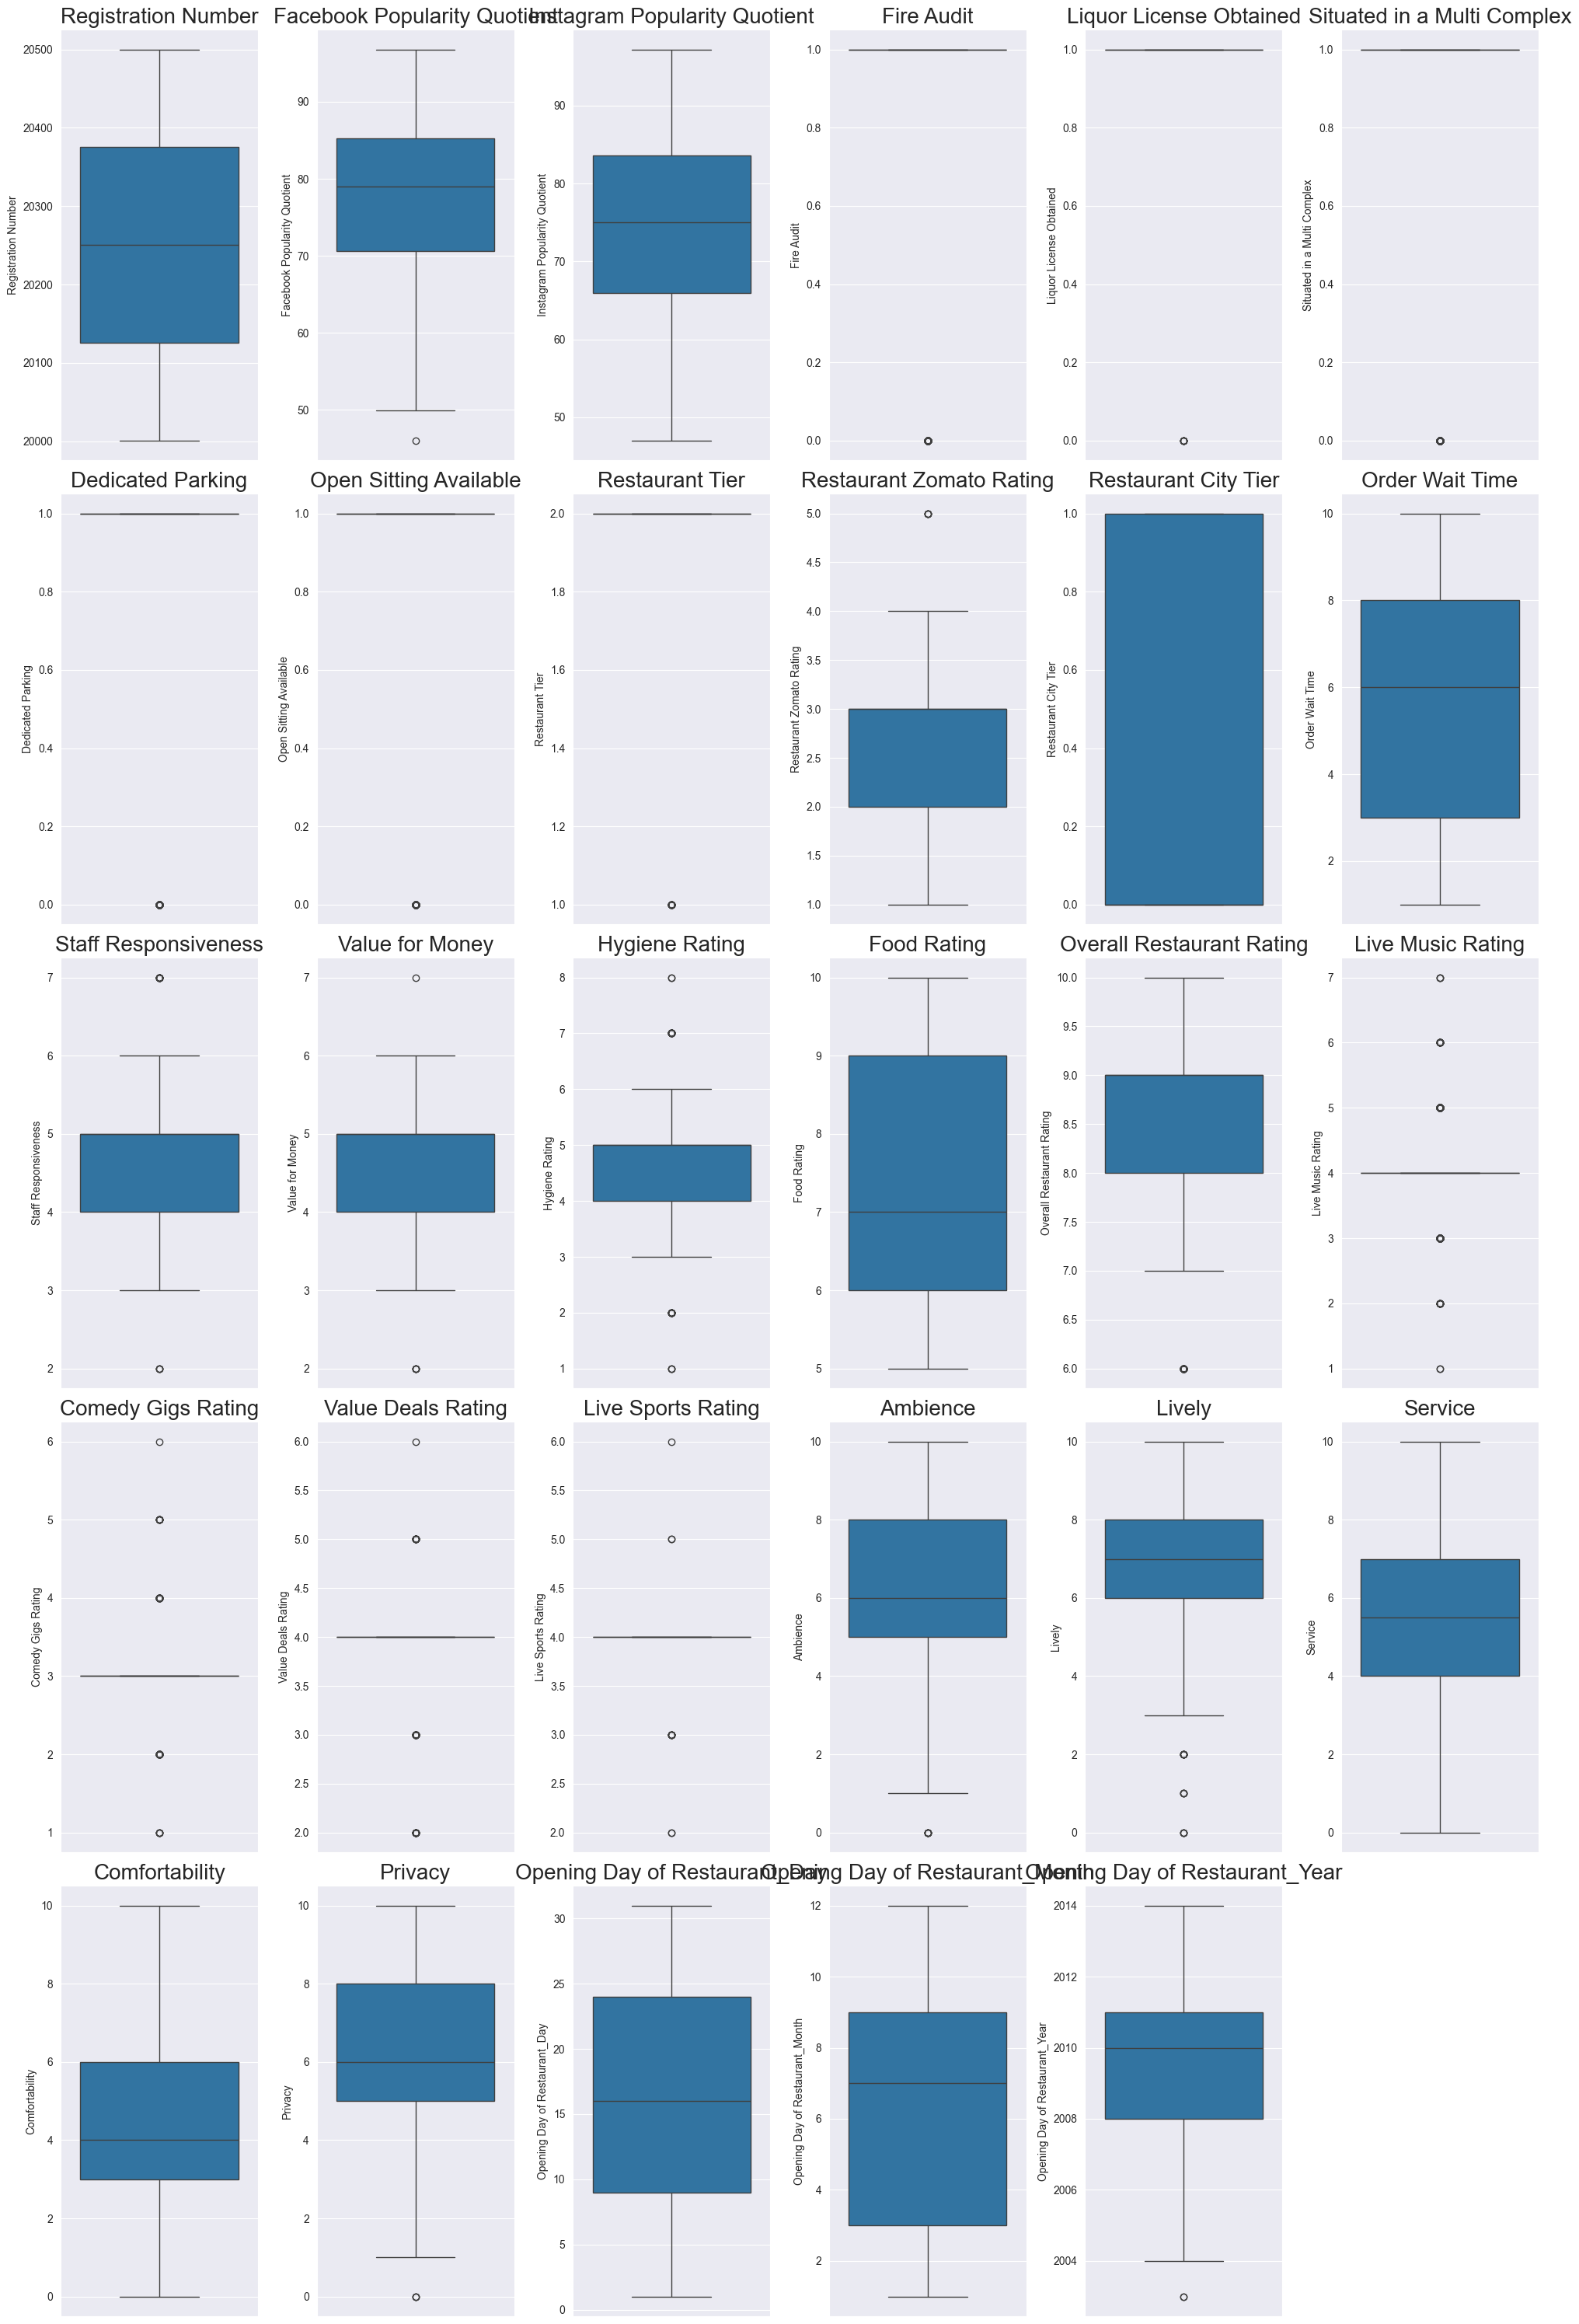

In [22]:
numeric_cols_test = test.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(20, 30))

# print boxplots of all numerical values in testing data
for i, variable in enumerate(numeric_cols_test):
    plt.subplot(5, 6, i + 1)
    sns.boxplot(data=test, y=variable, whis=1.5)
    plt.tight_layout()
    plt.title(variable, fontsize=20)

plt.show()

### Observations:
+ There are columns of values in both the test and train data sets that are binomial. The outliers for these should be left alone as their removal can skew the data incorrectly.

In [23]:
def treat_outliers(df, col):
    """
    treats outliers in a variable
    col: str, name of the numerical variable
    df: dataframe
    col: name of the column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    treat outlier in all numerical variables
    col_list: list of numerical variables
    df: data frame
    """
    #   use treat_outliers on all columns in col_list in dataframe df
    for c in col_list:
        df = treat_outliers(df, c)

    return df

In [24]:
# creates list used for treating all outliers. excludes binomial values
numeric_cols_train_minus_cols_0_to_1 = numeric_cols_train
numeric_cols_train_minus_cols_0_to_1.pop(
    numeric_cols_train_minus_cols_0_to_1.index("Fire Audit")
)
numeric_cols_train_minus_cols_0_to_1.pop(
    numeric_cols_train_minus_cols_0_to_1.index("Liquor License Obtained")
)
numeric_cols_train_minus_cols_0_to_1.pop(
    numeric_cols_train_minus_cols_0_to_1.index("Situated in a Multi Complex")
)
numeric_cols_train_minus_cols_0_to_1.pop(
    numeric_cols_train_minus_cols_0_to_1.index("Dedicated Parking")
)
numeric_cols_train_minus_cols_0_to_1.pop(
    numeric_cols_train_minus_cols_0_to_1.index("Open Sitting Available")
)
numeric_cols_train_minus_cols_0_to_1.pop(
    numeric_cols_train_minus_cols_0_to_1.index("Restaurant Tier")
)
numeric_cols_train_minus_cols_0_to_1.pop(
    numeric_cols_train_minus_cols_0_to_1.index("Comedy Gigs Rating")
)
numeric_cols_train_minus_cols_0_to_1.pop(
    numeric_cols_train_minus_cols_0_to_1.index("Live Sports Rating")
)
numeric_cols_train_minus_cols_0_to_1.pop(
    numeric_cols_train_minus_cols_0_to_1.index("Live Music Rating")
)
numeric_cols_train_minus_cols_0_to_1.pop(
    numeric_cols_train_minus_cols_0_to_1.index("Value Deals Rating")
)
print(len(numeric_cols_train_minus_cols_0_to_1))
numeric_cols_train_minus_cols_0_to_1

20


['Registration Number',
 'Annual Turnover',
 'Facebook Popularity Quotient',
 'Instagram Popularity Quotient',
 'Restaurant Zomato Rating',
 'Restaurant City Tier',
 'Order Wait Time',
 'Staff Responsiveness',
 'Value for Money',
 'Hygiene Rating',
 'Food Rating',
 'Overall Restaurant Rating',
 'Ambience',
 'Lively',
 'Service',
 'Comfortability',
 'Privacy',
 'Opening Day of Restaurant_Day',
 'Opening Day of Restaurant_Month',
 'Opening Day of Restaurant_Year']

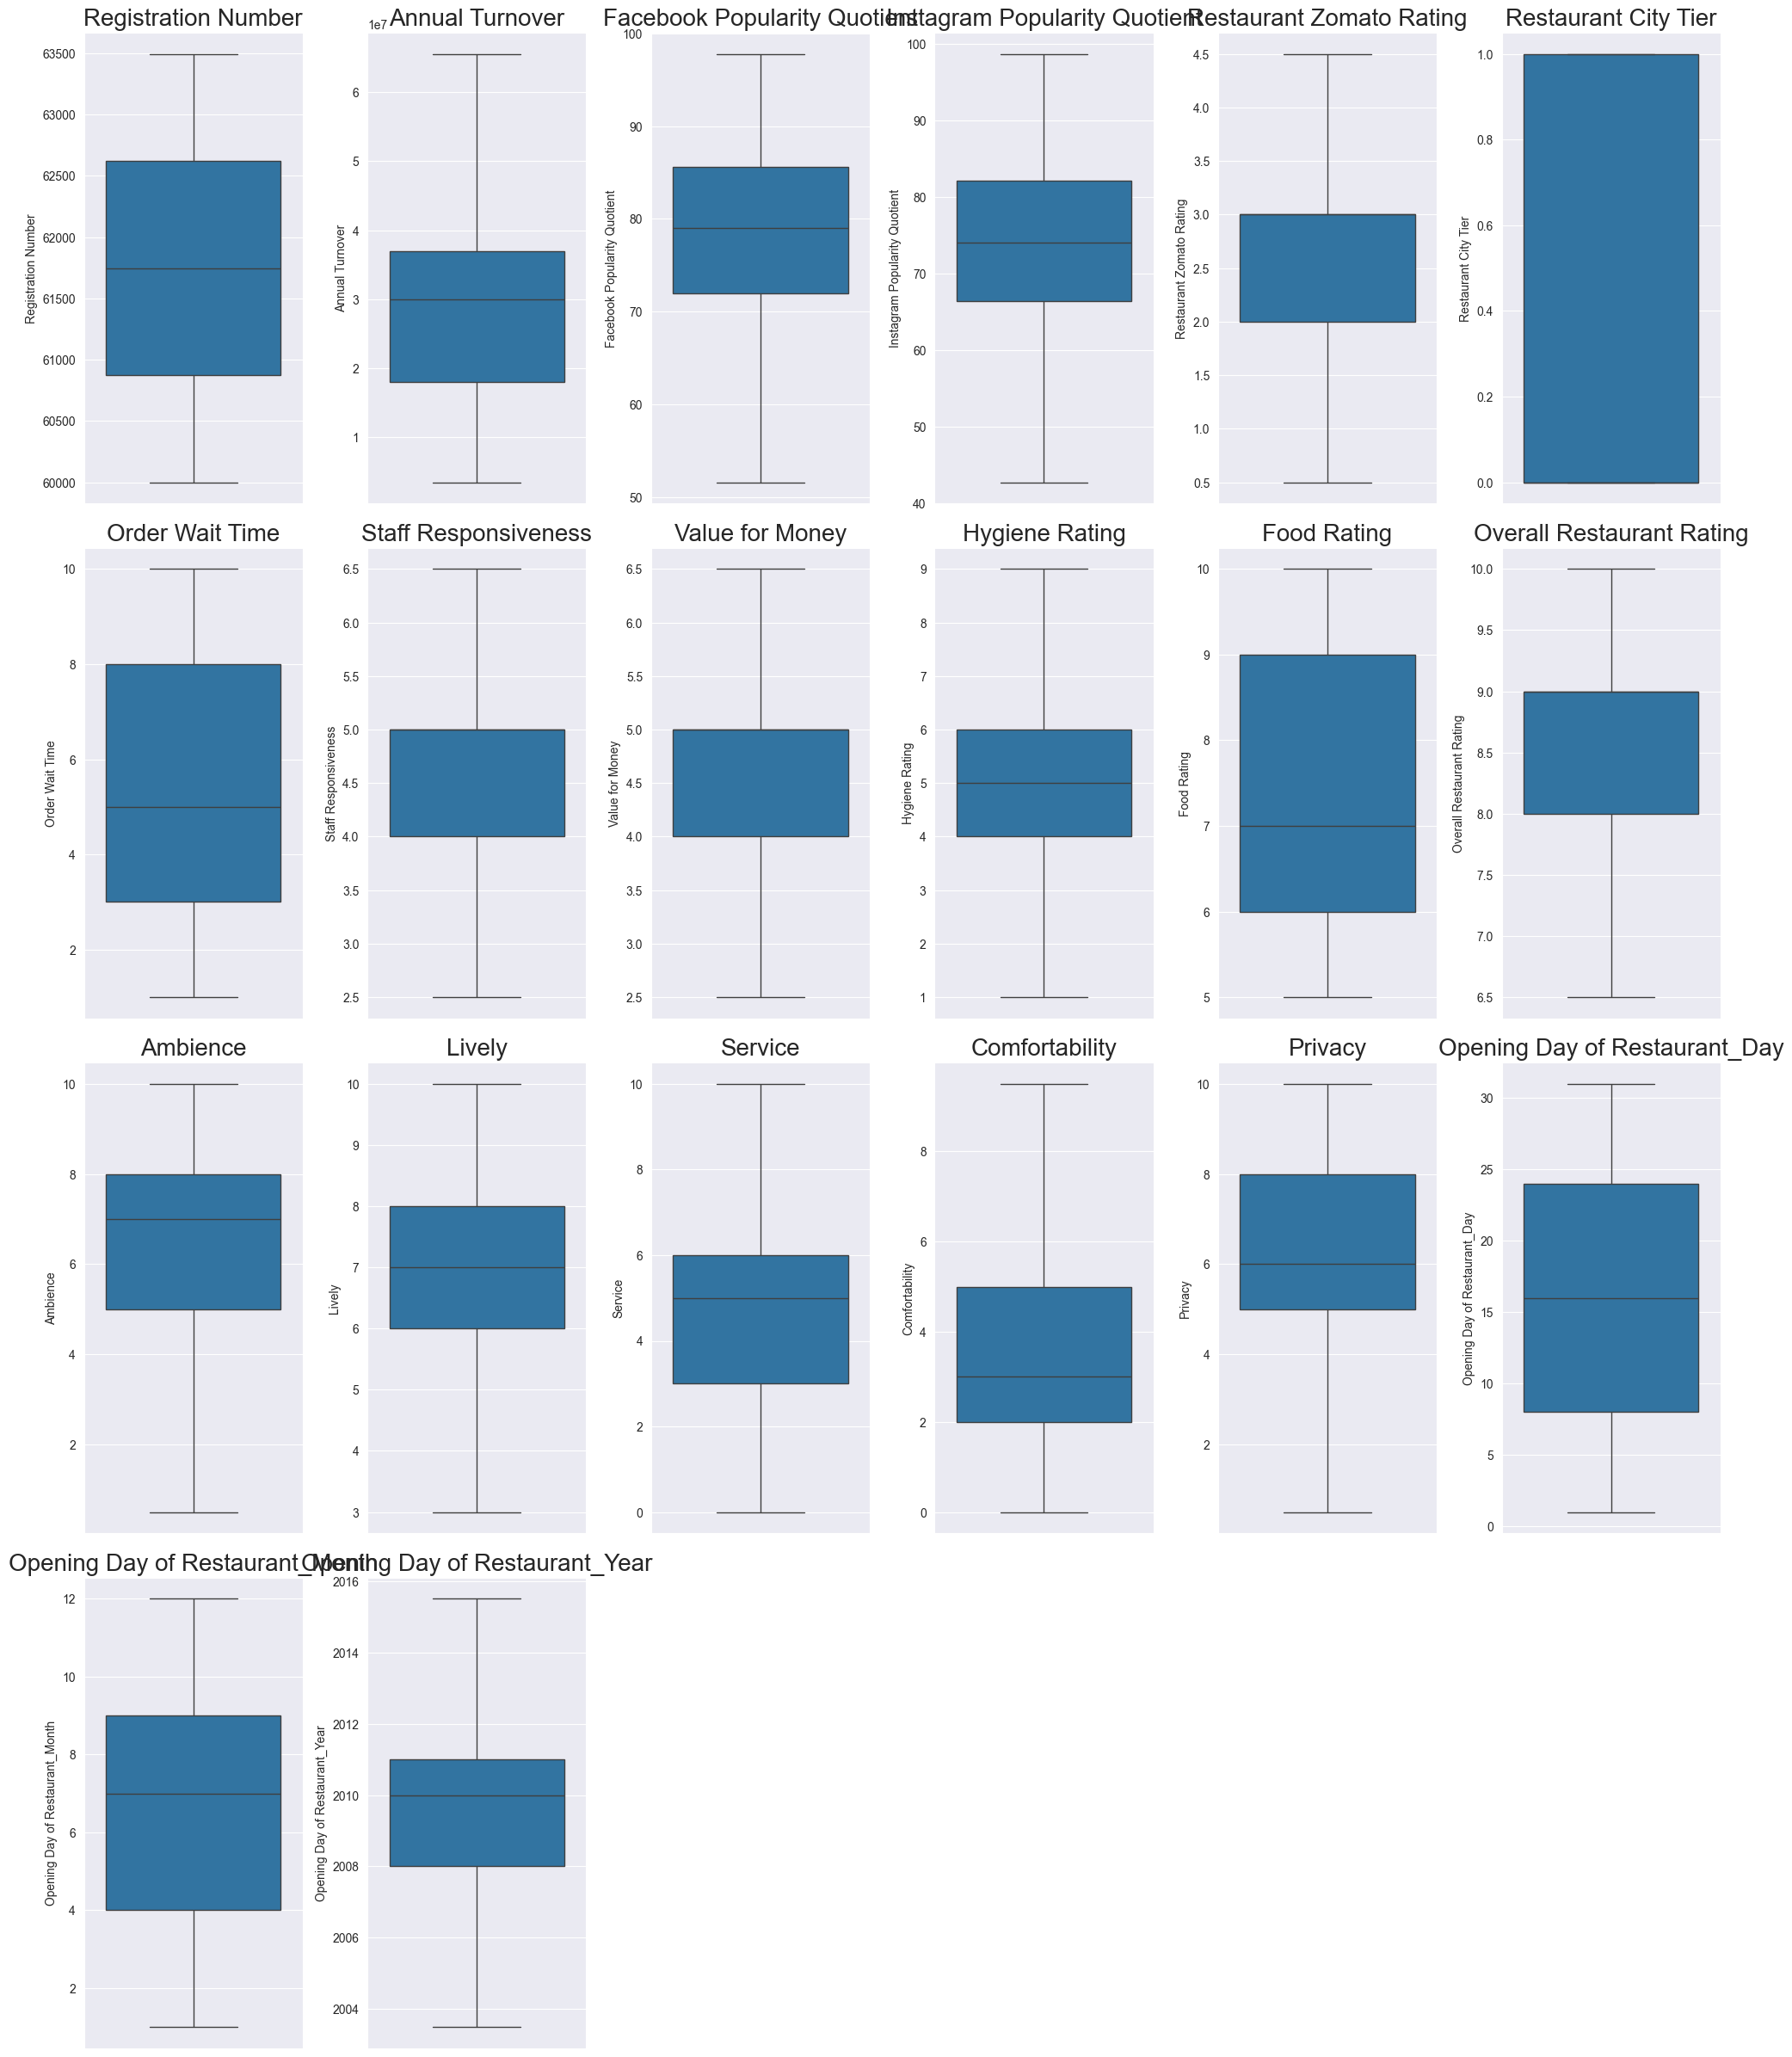

In [25]:
train = treat_outliers_all(
    train, numeric_cols_train_minus_cols_0_to_1
)  # set outliers to level of whiskers for all numeric columns except for ram

plt.figure(figsize=(20, 30))

# print boxplots of all numerical values in training data set
for i, variable in enumerate(numeric_cols_train):
    plt.subplot(5, 6, i + 1)
    sns.boxplot(data=train, y=variable, whis=1.5)
    plt.tight_layout()
    plt.title(variable, fontsize=20)

plt.show()

In [26]:
# creates list used for treating all outliers. excludes binomial values
numeric_cols_test_minus_cols_0_to_1 = numeric_cols_test
numeric_cols_test_minus_cols_0_to_1.pop(
    numeric_cols_test_minus_cols_0_to_1.index("Fire Audit")
)
numeric_cols_test_minus_cols_0_to_1.pop(
    numeric_cols_test_minus_cols_0_to_1.index("Liquor License Obtained")
)
numeric_cols_test_minus_cols_0_to_1.pop(
    numeric_cols_test_minus_cols_0_to_1.index("Situated in a Multi Complex")
)
numeric_cols_test_minus_cols_0_to_1.pop(
    numeric_cols_test_minus_cols_0_to_1.index("Dedicated Parking")
)
numeric_cols_test_minus_cols_0_to_1.pop(
    numeric_cols_test_minus_cols_0_to_1.index("Open Sitting Available")
)
numeric_cols_test_minus_cols_0_to_1.pop(
    numeric_cols_test_minus_cols_0_to_1.index("Restaurant Tier")
)
numeric_cols_test_minus_cols_0_to_1.pop(
    numeric_cols_test_minus_cols_0_to_1.index("Comedy Gigs Rating")
)
numeric_cols_test_minus_cols_0_to_1.pop(
    numeric_cols_test_minus_cols_0_to_1.index("Live Sports Rating")
)
numeric_cols_test_minus_cols_0_to_1.pop(
    numeric_cols_test_minus_cols_0_to_1.index("Live Music Rating")
)
numeric_cols_test_minus_cols_0_to_1.pop(
    numeric_cols_test_minus_cols_0_to_1.index("Value Deals Rating")
)
print(len(numeric_cols_test_minus_cols_0_to_1))
numeric_cols_test_minus_cols_0_to_1

19


['Registration Number',
 'Facebook Popularity Quotient',
 'Instagram Popularity Quotient',
 'Restaurant Zomato Rating',
 'Restaurant City Tier',
 'Order Wait Time',
 'Staff Responsiveness',
 'Value for Money',
 'Hygiene Rating',
 'Food Rating',
 'Overall Restaurant Rating',
 'Ambience',
 'Lively',
 'Service',
 'Comfortability',
 'Privacy',
 'Opening Day of Restaurant_Day',
 'Opening Day of Restaurant_Month',
 'Opening Day of Restaurant_Year']

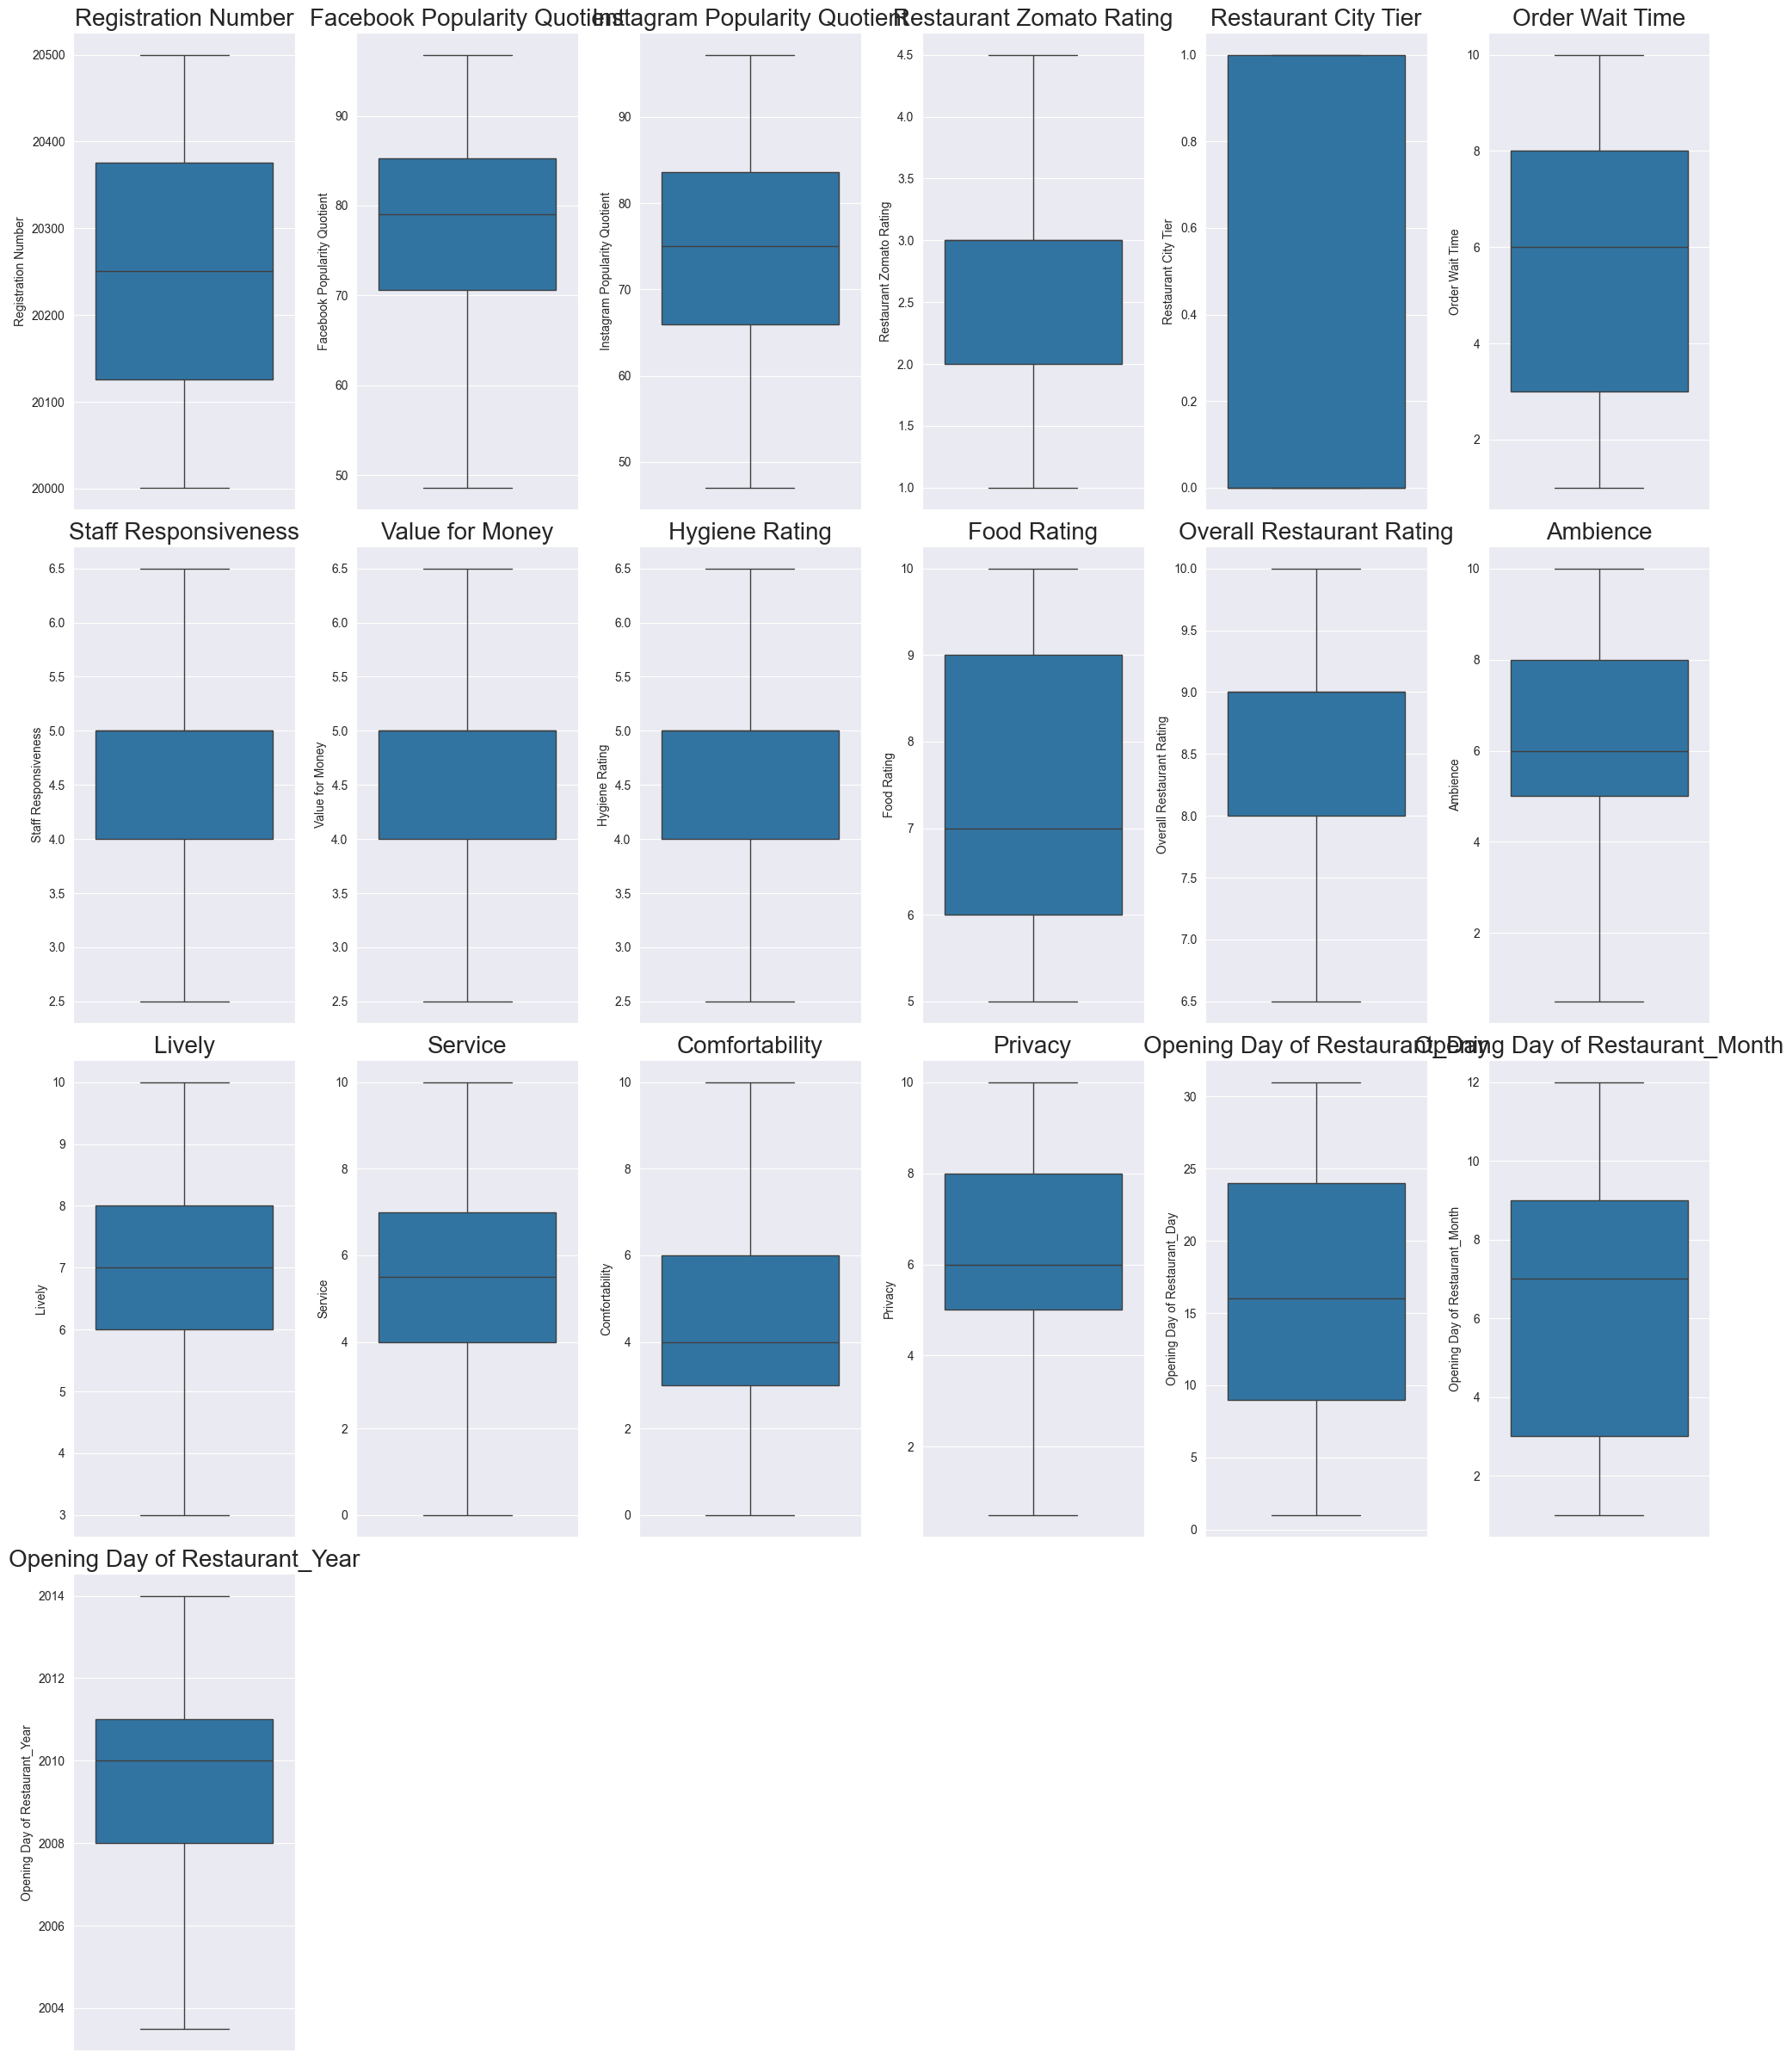

In [27]:
test = treat_outliers_all(
    test, numeric_cols_test_minus_cols_0_to_1
)  # set outliers to level of whiskers for all numeric columns except for ram

plt.figure(figsize=(20, 30))

# print boxplots of all numerical values in testing data set
for i, variable in enumerate(numeric_cols_test):
    plt.subplot(5, 6, i + 1)
    sns.boxplot(data=test, y=variable, whis=1.5)
    plt.tight_layout()
    plt.title(variable, fontsize=20)

plt.show()

## Feature Engineering

In [28]:
train

,Registration Number,Annual Turnover,Cuisine,City,Restaurant Location,Facebook Popularity Quotient,Endorsed By,Instagram Popularity Quotient,Fire Audit,Liquor License Obtained,Situated in a Multi Complex,Dedicated Parking,Open Sitting Available,Restaurant Tier,Restaurant Type,Restaurant Theme,Restaurant Zomato Rating,Restaurant City Tier,Order Wait Time,Staff Responsiveness,Value for Money,Hygiene Rating,Food Rating,Overall Restaurant Rating,Live Music Rating,Comedy Gigs Rating,Value Deals Rating,Live Sports Rating,Ambience,Lively,Service,Comfortability,Privacy,Opening Day of Restaurant_Day,Opening Day of Restaurant_Month,Opening Day of Restaurant_Year
0,60001,42000000,"indian,irish",Bangalore,Near Business Hub,84.30,Not Specific,95.80,1,1,1,0,1,2.0,Bar,Arabian,3.0,0,2,5.0,5.0,5,7,10.0,4.0,3.0,4.0,4.0,8.0,8,6,6.0,6.0,14,2,2009.0
1,60002,50000000,"indian,irish",Indore,Near Party Hub,85.40,Tier A Celebrity,85.00,1,1,1,1,0,2.0,Bar,Greek,3.0,0,6,6.0,6.0,7,8,9.0,4.0,4.0,4.0,4.0,5.0,7,7,3.0,8.0,29,9,2008.0
2,60003,32500000,"tibetan,italian",Chennai,Near Business Hub,85.00,Tier A Celebrity,68.20,1,1,1,1,0,2.0,Bar,90's,3.0,0,2,6.0,5.0,3,7,8.0,3.0,3.0,4.0,4.0,7.0,10,5,2.0,8.0,30,7,2011.0
3,60004,65500000,"turkish,nigerian",Gurgaon,Near Party Hub,85.60,Tier A Celebrity,83.60,0,1,1,1,1,1.0,Bar,Arabian,3.0,1,7,6.0,5.0,6,8,9.0,6.0,3.0,4.0,4.0,7.0,7,4,3.0,5.0,30,11,2008.0
4,60005,20000000,"irish,belgian",Manesar,Near Party Hub,79.00,Tier A Celebrity,76.80,1,1,1,1,1,2.0,Bar,Greek,3.0,0,10,5.0,6.0,4,8,6.5,4.0,2.0,4.0,4.0,7.0,6,2,4.0,6.0,22,2,2010.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3488,63489,40500000,"algerian,belgian",-1,Near Party Hub,69.10,Not Specific,62.11,1,1,0,1,1,2.0,Bar,Arabian,4.0,0,3,5.0,5.0,6,6,9.0,5.0,3.0,4.0,4.0,7.0,7,6,6.0,8.0,20,3,2009.0
3489,63490,32500000,"tibetan,greek",Bangalore,Near Party Hub,91.00,Not Specific,96.30,1,1,0,1,0,2.0,Bar,Greek,3.0,0,1,4.0,5.0,7,8,9.0,4.0,3.0,4.0,4.0,4.0,9,4,0.0,5.0,5,2,2012.0
3490,63491,42500000,"indian,irish",Chennai,Near Party Hub,80.83,Not Specific,86.80,1,1,1,1,0,2.0,Bar,Nature,3.0,1,8,5.0,4.0,6,6,8.0,4.0,3.0,4.0,3.0,6.0,8,3,3.0,7.0,21,5,2009.0
3491,63492,53000000,"japanese,thai",Bangalore,Near Party Hub,79.40,Not Specific,86.00,1,1,1,1,1,2.0,Bar,Greek,3.0,1,5,5.0,3.0,5,10,7.0,3.0,2.0,4.0,4.0,7.0,6,3,3.0,6.0,22,6,2008.0


In [29]:
train

,Registration Number,Annual Turnover,Cuisine,City,Restaurant Location,Facebook Popularity Quotient,Endorsed By,Instagram Popularity Quotient,Fire Audit,Liquor License Obtained,Situated in a Multi Complex,Dedicated Parking,Open Sitting Available,Restaurant Tier,Restaurant Type,Restaurant Theme,Restaurant Zomato Rating,Restaurant City Tier,Order Wait Time,Staff Responsiveness,Value for Money,Hygiene Rating,Food Rating,Overall Restaurant Rating,Live Music Rating,Comedy Gigs Rating,Value Deals Rating,Live Sports Rating,Ambience,Lively,Service,Comfortability,Privacy,Opening Day of Restaurant_Day,Opening Day of Restaurant_Month,Opening Day of Restaurant_Year
0,60001,42000000,"indian,irish",Bangalore,Near Business Hub,84.30,Not Specific,95.80,1,1,1,0,1,2.0,Bar,Arabian,3.0,0,2,5.0,5.0,5,7,10.0,4.0,3.0,4.0,4.0,8.0,8,6,6.0,6.0,14,2,2009.0
1,60002,50000000,"indian,irish",Indore,Near Party Hub,85.40,Tier A Celebrity,85.00,1,1,1,1,0,2.0,Bar,Greek,3.0,0,6,6.0,6.0,7,8,9.0,4.0,4.0,4.0,4.0,5.0,7,7,3.0,8.0,29,9,2008.0
2,60003,32500000,"tibetan,italian",Chennai,Near Business Hub,85.00,Tier A Celebrity,68.20,1,1,1,1,0,2.0,Bar,90's,3.0,0,2,6.0,5.0,3,7,8.0,3.0,3.0,4.0,4.0,7.0,10,5,2.0,8.0,30,7,2011.0
3,60004,65500000,"turkish,nigerian",Gurgaon,Near Party Hub,85.60,Tier A Celebrity,83.60,0,1,1,1,1,1.0,Bar,Arabian,3.0,1,7,6.0,5.0,6,8,9.0,6.0,3.0,4.0,4.0,7.0,7,4,3.0,5.0,30,11,2008.0
4,60005,20000000,"irish,belgian",Manesar,Near Party Hub,79.00,Tier A Celebrity,76.80,1,1,1,1,1,2.0,Bar,Greek,3.0,0,10,5.0,6.0,4,8,6.5,4.0,2.0,4.0,4.0,7.0,6,2,4.0,6.0,22,2,2010.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3488,63489,40500000,"algerian,belgian",-1,Near Party Hub,69.10,Not Specific,62.11,1,1,0,1,1,2.0,Bar,Arabian,4.0,0,3,5.0,5.0,6,6,9.0,5.0,3.0,4.0,4.0,7.0,7,6,6.0,8.0,20,3,2009.0
3489,63490,32500000,"tibetan,greek",Bangalore,Near Party Hub,91.00,Not Specific,96.30,1,1,0,1,0,2.0,Bar,Greek,3.0,0,1,4.0,5.0,7,8,9.0,4.0,3.0,4.0,4.0,4.0,9,4,0.0,5.0,5,2,2012.0
3490,63491,42500000,"indian,irish",Chennai,Near Party Hub,80.83,Not Specific,86.80,1,1,1,1,0,2.0,Bar,Nature,3.0,1,8,5.0,4.0,6,6,8.0,4.0,3.0,4.0,3.0,6.0,8,3,3.0,7.0,21,5,2009.0
3491,63492,53000000,"japanese,thai",Bangalore,Near Party Hub,79.40,Not Specific,86.00,1,1,1,1,1,2.0,Bar,Greek,3.0,1,5,5.0,3.0,5,10,7.0,3.0,2.0,4.0,4.0,7.0,6,3,3.0,6.0,22,6,2008.0


### Observations:
+ The City column has incorrect spelled city types that must be corrected.
+ Delete cities that clumsy mispelling mistakes by sorting by count of 1 and deleting those columns after dummy values have been created.

In [30]:
train.City = (
    train.City.str.title()
)  # fixes case sensitive errors. making all values of case title
train.City = (
    train.City.str.strip()
)  # fixes whitespace errors. Takes away extra whitespaces in columns values

updated_city_train = (
    train.City.value_counts().reset_index()
)  # creates list of cities filtered by count
# creates list of cities that occur only once.
updated_city_train_list = list(
    updated_city_train[updated_city_train["count"] == 1]["City"]
)
updated_city_train_list

['Hyderabad(Bhadurpally)',
 'Gulbarga',
 'Kakinada',
 'Jalandhar',
 'Chennai, Bangalore',
 'Delhi/Ncr',
 'Tirupati',
 'Allahabad',
 'Vapi',
 'Pilani',
 'Jhajjar',
 'Ratnagiri',
 'Orissa',
 'Muvattupuzha',
 'Muzzafarpur',
 'Ras Al Khaimah',
 'Jammu',
 'Gajiabaad',
 'Shimla',
 'Bihar',
 'Singaruli',
 'Burdwan',
 'Jaspur',
 'Tornagallu',
 'Bharuch',
 'Gonda',
 'Joshimath',
 'Kharagpur',
 'Navi Mumbai , Hyderabad',
 'Bahadurgarh',
 'Varanasi',
 'Hderabad',
 'Bhilai',
 'Kolhapur',
 'Kurnool',
 'Punr',
 'Surat',
 'Pondi',
 'Durgapur',
 'Mettur, Tamil Nadu',
 'Nagari',
 'Baddi Hp',
 'Nellore',
 'Sahibabad',
 'Howrah',
 'Trichur',
 'Khopoli',
 'Keral',
 'London',
 'Karnal',
 'Kala Amb',
 'Bathinda',
 'Rayagada, Odisha',
 'Roorkee',
 'Technopark, Trivandrum',
 'Muzaffarnagar',
 'Salem',
 'Muzaffarpur',
 'Angul',
 'Jagdalpur',
 'Sonepat',
 'Cheyyar',
 'Australia',
 'Gurga',
 'Hissar',
 'Banagalore',
 'Dharamshala',
 'Nouda',
 'Raigarh',
 'Bulandshahar',
 'Kolkata`',
 'Alwar',
 'Ariyalur',
 'Bank

In [31]:
# The above code re-writest the City column as an object, so we must make it a category column again
train.City = train.City.astype("category")

In [32]:
train.dtypes

Registration Number                   int64
Annual Turnover                       int64
Cuisine                            category
City                               category
Restaurant Location                category
Facebook Popularity Quotient        float64
Endorsed By                        category
Instagram Popularity Quotient       float64
Fire Audit                            int64
Liquor License Obtained               int64
Situated in a Multi Complex           int64
Dedicated Parking                     int64
Open Sitting Available                int64
Restaurant Tier                     float64
Restaurant Type                    category
Restaurant Theme                   category
Restaurant Zomato Rating            float64
Restaurant City Tier                  int64
Order Wait Time                       int64
Staff Responsiveness                float64
Value for Money                     float64
Hygiene Rating                        int64
Food Rating                     

In [33]:
# creates list of columns that are categorical to prepare for teh get_dummies function
category_cols_train = train.select_dtypes(include="category").columns.tolist()

# creates columns of the categorical columns using one-hot encoding
train = pd.get_dummies(
    train, columns=category_cols_train
)  # create dummy columns for all categorical columns
train

,Registration Number,Annual Turnover,Facebook Popularity Quotient,Instagram Popularity Quotient,Fire Audit,Liquor License Obtained,Situated in a Multi Complex,Dedicated Parking,Open Sitting Available,Restaurant Tier,Restaurant Zomato Rating,Restaurant City Tier,Order Wait Time,Staff Responsiveness,Value for Money,Hygiene Rating,Food Rating,Overall Restaurant Rating,Live Music Rating,Comedy Gigs Rating,Value Deals Rating,Live Sports Rating,Ambience,Lively,Service,Comfortability,Privacy,Opening Day of Restaurant_Day,Opening Day of Restaurant_Month,Opening Day of Restaurant_Year,"Cuisine_algerian,algerian","Cuisine_algerian,belgian","Cuisine_algerian,korean","Cuisine_british,belgian","Cuisine_british,japanese","Cuisine_chinese,salvadorian","Cuisine_cuban,british","Cuisine_hawaiian,latvian","Cuisine_indian,irish","Cuisine_irish,belgian","Cuisine_japanese,thai","Cuisine_nigerian,cajun","Cuisine_peruvian,cuban","Cuisine_polish,jewish","Cuisine_swedish,greek","Cuisine_tibetan,greek","Cuisine_tibetan,italian","Cuisine_turkish,nigerian","Cuisine_turkish,sapnish","Cuisine_welsh,thai",City_-1,City_Agra,City_Ahmedabad,City_Ahmednagar,City_Allahabad,City_Alwar,City_Am,City_Ambala,City_Angul,City_Ariyalur,City_Asansol,City_Aurangabad,City_Australia,City_Baddi Hp,City_Bahadurgarh,City_Banagalore,City_Bangalore,City_Banglore,City_Bankura,City_Bareli,City_Baroda,City_Bathinda,City_Beawar,City_Belgaum,City_Bellary,City_Bengaluru,City_Bhagalpur,City_Bharuch,City_Bhilai,City_Bhiwadi,City_Bhopal,City_Bhubaneshwar,City_Bhubaneswar,City_Bhubneshwar,City_Bihar,City_Bikaner,City_Bilaspur,City_Bulandshahar,City_Bundi,City_Burdwan,City_Calicut,City_Chandigarh,City_Chandrapur,City_Chennai,City_Chennai & Mumbai,"City_Chennai, Bangalore",City_Cheyyar,City_Coimbatore,City_Daman And Diu,City_Dehradun,City_Delhi,City_Delhi/Ncr,City_Dhanbad,City_Dharamshala,City_Dharmapuri,City_Dharuhera,City_Dubai,City_Durgapur,City_Ernakulam,City_Faridabad,City_Gagret,City_Gajiabaad,City_Gandhi Nagar,City_Gandhinagar,City_Ganjam,City_Gaziabaad,City_Ghaziabad,City_Gonda,City_Greater Noida,City_Gulbarga,City_Gurga,City_Gurgaon,City_Gurgoan,City_Gwalior,City_Haridwar,City_Hderabad,City_Hissar,City_Hospete,City_Howrah,City_Hubli,City_Hyderabad,City_Hyderabad(Bhadurpally),City_India,"City_Indirapuram, Ghaziabad",City_Indore,City_Jabalpur,City_Jagdalpur,City_Jaipur,City_Jalandhar,City_Jammu,City_Jamnagar,City_Jamshedpur,City_Jaspur,City_Jhajjar,City_Jhansi,City_Jodhpur,City_Joshimath,City_Jowai,City_Kakinada,City_Kala Amb,City_Kanpur,City_Karnal,City_Keral,City_Kharagpur,City_Khopoli,City_Kochi,City_Kochi/Cochin,"City_Kochi/Cochin, Chennai And Coimbatore",City_Kolhapur,City_Kolkata,City_Kolkata`,City_Kota,"City_Kudankulam ,Tarapur",City_Kurnool,City_London,City_Lucknow,City_Ludhiana,City_Madurai,City_Maharajganj,City_Manesar,City_Mangalore,City_Meerut,"City_Mettur, Tamil Nadu",City_Miryalaguda,City_Mohali,City_Mumbai,City_Muvattupuzha,City_Muzaffarnagar,City_Muzaffarpur,City_Muzzafarpur,City_Mysore,City_Nagari,City_Nagpur,City_Nalagarh,City_Nanded,City_Nashik,City_Nasikcity,City_Navi Mumbai,"City_Navi Mumbai , Hyderabad",City_Ncr,City_Neemrana,City_Nellore,City_New Delhi,City_New Delhi - Jaisalmer,City_Noida,City_Nouda,City_Ongole,City_Orissa,City_Panchkula,City_Pantnagar,City_Patna,City_Pilani,City_Pondi,City_Pondicherry,City_Pondy,City_Punchkula,City_Pune,City_Punr,City_Raigarh,City_Raipur,City_Rajasthan,City_Rajkot,City_Ranchi,City_Ras Al Khaimah,City_Ratnagiri,"City_Rayagada, Odisha",City_Rewari,City_Rohtak,City_Roorkee,City_Rudrapur,"City_Sadulpur,Rajgarh,Distt-Churu,Rajasthan",City_Sahibabad,City_Salem,City_Sambalpur,City_Secunderabad,City_Shahdol,City_Shimla,City_Siliguri,City_Singaruli,City_Sonepat,City_Sonipat,City_Surat,"City_Technopark, Trivandrum",City_Thane,City_Thiruvananthapuram,City_Tirunelvelli,City_Tirupathi,City_Tirupati,City_Tornagallu,City_Trichur,City_Trichy,City_Trivandrum,City_Udaipur,City_Una,City_Unnao,City_Vadodara,City_Vandavasi,City_Vapi,City_Varanasi,

In [34]:
# drops columns that have counts of 1 occurence
for city in updated_city_train_list:
    train.drop("City_" + str(city), axis=1, inplace=True)

In [35]:
train

,Registration Number,Annual Turnover,Facebook Popularity Quotient,Instagram Popularity Quotient,Fire Audit,Liquor License Obtained,Situated in a Multi Complex,Dedicated Parking,Open Sitting Available,Restaurant Tier,Restaurant Zomato Rating,Restaurant City Tier,Order Wait Time,Staff Responsiveness,Value for Money,Hygiene Rating,Food Rating,Overall Restaurant Rating,Live Music Rating,Comedy Gigs Rating,Value Deals Rating,Live Sports Rating,Ambience,Lively,Service,Comfortability,Privacy,Opening Day of Restaurant_Day,Opening Day of Restaurant_Month,Opening Day of Restaurant_Year,"Cuisine_algerian,algerian","Cuisine_algerian,belgian","Cuisine_algerian,korean","Cuisine_british,belgian","Cuisine_british,japanese","Cuisine_chinese,salvadorian","Cuisine_cuban,british","Cuisine_hawaiian,latvian","Cuisine_indian,irish","Cuisine_irish,belgian","Cuisine_japanese,thai","Cuisine_nigerian,cajun","Cuisine_peruvian,cuban","Cuisine_polish,jewish","Cuisine_swedish,greek","Cuisine_tibetan,greek","Cuisine_tibetan,italian","Cuisine_turkish,nigerian","Cuisine_turkish,sapnish","Cuisine_welsh,thai",City_-1,City_Agra,City_Ahmedabad,City_Ahmednagar,City_Ambala,City_Aurangabad,City_Bangalore,City_Banglore,City_Beawar,City_Belgaum,City_Bengaluru,City_Bhopal,City_Bhubaneshwar,City_Bhubaneswar,City_Bhubneshwar,City_Bilaspur,City_Chandigarh,City_Chandrapur,City_Chennai,City_Coimbatore,City_Dehradun,City_Delhi,City_Dhanbad,City_Dubai,City_Faridabad,City_Gandhi Nagar,City_Gandhinagar,City_Ghaziabad,City_Greater Noida,City_Gurgaon,City_Gurgoan,City_Haridwar,City_Hyderabad,City_Indore,City_Jabalpur,City_Jaipur,City_Jamnagar,City_Jamshedpur,City_Jodhpur,City_Kanpur,City_Kochi,City_Kochi/Cochin,City_Kolkata,City_Kota,City_Lucknow,City_Ludhiana,City_Madurai,City_Manesar,City_Mangalore,City_Meerut,City_Mohali,City_Mumbai,City_Mysore,City_Nagpur,City_Nalagarh,City_Nashik,City_Nasikcity,City_Navi Mumbai,City_Neemrana,City_New Delhi,City_Noida,City_Panchkula,City_Pantnagar,City_Patna,City_Pondicherry,City_Pune,City_Raipur,City_Ranchi,City_Rudrapur,City_Secunderabad,City_Shahdol,City_Siliguri,City_Sonipat,City_Thane,City_Thiruvananthapuram,City_Tirupathi,City_Trichy,City_Trivandrum,City_Udaipur,City_Unnao,City_Vadodara,City_Vijayawada,City_Visakhapatnam,City_Vizag,Restaurant Location_Near Business Hub,Restaurant Location_Near Party Hub,Endorsed By_Local Celebrity,Endorsed By_Not Specific,Endorsed By_Tier A Celebrity,Restaurant Type_Bar,Restaurant Type_Buffet/Family Restaurant,Restaurant Type_Caffee,Restaurant Type_Gastro Bar,Restaurant Theme_90's,Restaurant Theme_Ambiance,Restaurant Theme_Arabian,Restaurant Theme_Bakery,Restaurant Theme_Belise,Restaurant Theme_Benedicta,Restaurant Theme_Bettaso,Restaurant Theme_Cafepro,Restaurant Theme_Carbone,Restaurant Theme_Chinese,Restaurant Theme_Cinnamon,Restaurant Theme_Delicio,Restaurant Theme_Downtown,Restaurant Theme_English,Restaurant Theme_Flavors,Restaurant Theme_Grand,Restaurant Theme_Greek,Restaurant Theme_Italica,Restaurant Theme_LaCuisine,Restaurant Theme_Marco,Restaurant Theme_Mise En,Restaurant Theme_Molino,Restaurant Theme_Moonrise,Restaurant Theme_Nature,Restaurant Theme_Parsi,Restaurant Theme_Petit,Restaurant Theme_Picante,Restaurant Theme_Piquant,Restaurant Theme_Resca,Restaurant Theme_Sage,Restaurant Theme_Savory,Restaurant Theme_Spoon,Restaurant Theme_TheGem,Restaurant Theme_Umami
0,60001,42000000,84.30,95.80,1,1,1,0,1,2.0,3.0,0,2,5.0,5.0,5,7,10.0,4.0,3.0,4.0,4.0,8.0,8,6,6.0,6.0,14,2,2009.0,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False

### Observations:
+ a few cities were mispelled the same way multiple times. These cities must be placed in the correct cities column and the mispelled city must be deleted.
+ cities that were mispelled
    + Banglore
    + Bhubaneshwar
    + Bhubneshwar
    + Kochi/Cochin (was not mispelled, but does not need "/")

In [36]:
# takes all city Banglore values and places it in the correct column of Bangalore
banglore_index = []
for i, val in enumerate(train.City_Banglore):
    if val == 1:
        banglore_index.append(i)
for bi in banglore_index:
    for i, val in enumerate(train.City_Bangalore):
        if bi == i:
            train.City_Bangalore[i] = 1
train.drop("City_Banglore", axis=1, inplace=True)  # drops mispelled column

/var/folders/dy/l71schps16q1nz5z1g20vglc0000gq/T/ipykernel_3690/2450960739.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  train.City_Bangalore[i] = 1
/var/folders/dy/l71schps16q1nz5z1g20vglc0000gq/T/ipykernel_3690/2450960739.py:9: Setti

In [37]:
train.City_Bangalore.value_counts()

City_Bangalore
False    2897
True      596
Name: count, dtype: int64

In [38]:
# takes all city Bhubaneshwar values and places it in the correct column of Bhubaneswar
bhubaneshwar_index = []
for i, val in enumerate(train.City_Bhubaneshwar):
    if val == 1:
        bhubaneshwar_index.append(i)
for bi in bhubaneshwar_index:
    for i, val in enumerate(train.City_Bhubaneswar):
        if bi == i:
            train.City_Bhubaneswar[i] = 1
train.drop("City_Bhubaneshwar", axis=1, inplace=True)  # drops mispelled column

/var/folders/dy/l71schps16q1nz5z1g20vglc0000gq/T/ipykernel_3690/2034216772.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  train.City_Bhubaneswar[i] = 1
/var/folders/dy/l71schps16q1nz5z1g20vglc0000gq/T/ipykernel_3690/2034216772.py:9: Set

In [39]:
train.City_Bhubaneswar.value_counts()

City_Bhubaneswar
False    3462
True       31
Name: count, dtype: int64

In [40]:
# takes all city Bhubneshwar values and places it in the correct column of Bhubaneswar
bhubneshwar_index = []
for i, val in enumerate(train.City_Bhubneshwar):
    if val == 1:
        bhubneshwar_index.append(i)
for bi in bhubneshwar_index:
    for i, val in enumerate(train.City_Bhubaneswar):
        if bi == i:
            train.City_Bhubaneswar[i] = 1
train.drop("City_Bhubneshwar", axis=1, inplace=True)  # drops mispelled column

/var/folders/dy/l71schps16q1nz5z1g20vglc0000gq/T/ipykernel_3690/3931320961.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  train.City_Bhubaneswar[i] = 1
/var/folders/dy/l71schps16q1nz5z1g20vglc0000gq/T/ipykernel_3690/3931320961.py:9: Set

In [41]:
train.City_Bhubaneswar.value_counts()

City_Bhubaneswar
False    3458
True       35
Name: count, dtype: int64

In [42]:
# takes all city Kochi/Cochin values and places it in the correct column of Kochi
kochi_index = []
for i, val in enumerate(train["City_Kochi/Cochin"]):
    if val == 1:
        kochi_index.append(i)
for bi in kochi_index:
    for i, val in enumerate(train.City_Kochi):
        if bi == i:
            train.City_Kochi[i] = 1
train.drop("City_Kochi/Cochin", axis=1, inplace=True)  # deletes mispelled column

/var/folders/dy/l71schps16q1nz5z1g20vglc0000gq/T/ipykernel_3690/915862730.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  train.City_Kochi[i] = 1
/var/folders/dy/l71schps16q1nz5z1g20vglc0000gq/T/ipykernel_3690/915862730.py:9: SettingWith

In [43]:
train.City_Kochi.value_counts()

City_Kochi
False    3479
1          14
Name: count, dtype: int64

In [44]:
test.City = (
    test.City.str.title()
)  # fixes case sensitive errors. making all values of case title
test.City = (
    test.City.str.strip()
)  # fixes whitespace errors. Takes away extra whitespaces in columns values

updated_city_test = (
    test.City.value_counts().reset_index()
)  # creates list of cities filtered by count
# creates list of cities that occur only once.
updated_city_test_list = list(
    updated_city_test[updated_city_test["count"] == 1]["City"]
)
updated_city_test_list

['Rudrapur',
 'Patiala',
 'Karad',
 'Pilani',
 'Dammam',
 'Kochi/Cochin',
 'Haryana',
 'Rajpura',
 'Vellore',
 'Hissar',
 'Madurai',
 'Yamuna Nagar',
 'Asifabadbanglore',
 'Dausa',
 'Rourkela',
 'Banaglore',
 'Karnal',
 'Jodhpur',
 'Baripada',
 'Bilaspur',
 'Rae Bareli',
 'Rajkot',
 'Ranchi',
 'Guragaon',
 'Patna',
 'Hubli',
 'Guwahati',
 'New Dehli',
 'Sambalpur',
 'Ambala City',
 'Trivandrum',
 'Ongole',
 'Mangalore',
 'Thane',
 'Pondicherry',
 'Phagwara',
 'Latur (Maharashtra )',
 'Sampla',
 'Secunderabad',
 'Haldia',
 'Mainpuri',
 'Gorakhpur',
 'Shahibabad']

In [45]:
# The above code re-writest the City column as an object, so we must make it a category column again
test.City = test.City.astype("category")

In [46]:
# creates list of columns that are categorical to prepare for the get_dummies function
category_cols_test = test.select_dtypes(include="category").columns.tolist()

# creates columns of the categorical columns using one-hot encoding
test = pd.get_dummies(
    test, columns=category_cols_test
)  # create dummy columns for all categorical columns
test

,Registration Number,Facebook Popularity Quotient,Instagram Popularity Quotient,Fire Audit,Liquor License Obtained,Situated in a Multi Complex,Dedicated Parking,Open Sitting Available,Restaurant Tier,Restaurant Zomato Rating,Restaurant City Tier,Order Wait Time,Staff Responsiveness,Value for Money,Hygiene Rating,Food Rating,Overall Restaurant Rating,Live Music Rating,Comedy Gigs Rating,Value Deals Rating,Live Sports Rating,Ambience,Lively,Service,Comfortability,Privacy,Opening Day of Restaurant_Day,Opening Day of Restaurant_Month,Opening Day of Restaurant_Year,"Cuisine_algerian,algerian","Cuisine_algerian,belgian","Cuisine_algerian,korean","Cuisine_british,belgian","Cuisine_british,japanese","Cuisine_chinese,salvadorian","Cuisine_cuban,british","Cuisine_hawaiian,latvian","Cuisine_indian,irish","Cuisine_irish,belgian","Cuisine_japanese,thai","Cuisine_nigerian,cajun","Cuisine_peruvian,cuban","Cuisine_polish,jewish","Cuisine_swedish,greek","Cuisine_tibetan,greek","Cuisine_tibetan,italian","Cuisine_turkish,nigerian","Cuisine_turkish,sapnish","Cuisine_welsh,thai",City_-1,City_Ahmedabad,City_Ambala City,City_Asifabadbanglore,City_Banaglore,City_Bangalore,City_Banglore,City_Baripada,City_Bhopal,City_Bhubaneshwar,City_Bhubaneswar,City_Bilaspur,City_Chandigarh,City_Chennai,City_Coimbatore,City_Dammam,City_Dausa,City_Dehradun,City_Delhi,City_Faridabad,City_Gorakhpur,City_Greater Noida,City_Guragaon,City_Gurgaon,City_Guwahati,City_Haldia,City_Haryana,City_Hissar,City_Hubli,City_Hyderabad,City_Indore,City_Jaipur,City_Jodhpur,City_Kanpur,City_Karad,City_Karnal,City_Kochi/Cochin,City_Kolkata,City_Latur (Maharashtra ),City_Lucknow,City_Madurai,City_Mainpuri,City_Mangalore,City_Meerut,City_Mohali,City_Mumbai,City_Mysore,City_Nagpur,City_Navi Mumbai,City_New Dehli,City_New Delhi,City_Noida,City_Ongole,City_Patiala,City_Patna,City_Phagwara,City_Pilani,City_Pondicherry,City_Pune,City_Rae Bareli,City_Raipur,City_Rajkot,City_Rajpura,City_Ranchi,City_Rourkela,City_Rudrapur,City_Sambalpur,City_Sampla,City_Secunderabad,City_Shahibabad,City_Thane,City_Trivandrum,City_Vellore,City_Yamuna Nagar,Restaurant Location_Near Business Hub,Restaurant Location_Near Party Hub,Endorsed By_Local Celebrity,Endorsed By_Not Specific,Endorsed By_Tier A Celebrity,Restaurant Type_Bar,Restaurant Type_Buffet/Family Restaurant,Restaurant Type_Caffee,Restaurant Type_Gastro Bar,Restaurant Theme_90's,Restaurant Theme_Ambiance,Restaurant Theme_Arabian,Restaurant Theme_Belise,Restaurant Theme_Benedicta,Restaurant Theme_Carbone,Restaurant Theme_Chinese,Restaurant Theme_Delicio,Restaurant Theme_English,Restaurant Theme_Greek,Restaurant Theme_Marco,Restaurant Theme_Mise En,Restaurant Theme_Molino,Restaurant Theme_Moonrise,Restaurant Theme_Nature,Restaurant Theme_Parsi,Restaurant Theme_Petit,Restaurant Theme_Picante
0,20001,78.00,69.00,1,1,1,1,0,2,3.0,0,10,5.0,3.0,5.0,8,6.5,4.0,2.0,4.0,4.0,5.0,3,2,6,0.5,13,7,2010.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
1,20002,89.17,96.00,1,1,1,1,1,2,4.0,0,10,4.0,5.0,6.0,8,9.0,3.0,3.0,4.0,6.0,7.0,8,5,1,8.0,5,9,2011.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False

In [47]:
# drops all columns in test data set that have 1 occurence of them
for city in updated_city_test_list:
    test.drop("City_" + str(city), axis=1, inplace=True)

In [48]:
train

,Registration Number,Annual Turnover,Facebook Popularity Quotient,Instagram Popularity Quotient,Fire Audit,Liquor License Obtained,Situated in a Multi Complex,Dedicated Parking,Open Sitting Available,Restaurant Tier,Restaurant Zomato Rating,Restaurant City Tier,Order Wait Time,Staff Responsiveness,Value for Money,Hygiene Rating,Food Rating,Overall Restaurant Rating,Live Music Rating,Comedy Gigs Rating,Value Deals Rating,Live Sports Rating,Ambience,Lively,Service,Comfortability,Privacy,Opening Day of Restaurant_Day,Opening Day of Restaurant_Month,Opening Day of Restaurant_Year,"Cuisine_algerian,algerian","Cuisine_algerian,belgian","Cuisine_algerian,korean","Cuisine_british,belgian","Cuisine_british,japanese","Cuisine_chinese,salvadorian","Cuisine_cuban,british","Cuisine_hawaiian,latvian","Cuisine_indian,irish","Cuisine_irish,belgian","Cuisine_japanese,thai","Cuisine_nigerian,cajun","Cuisine_peruvian,cuban","Cuisine_polish,jewish","Cuisine_swedish,greek","Cuisine_tibetan,greek","Cuisine_tibetan,italian","Cuisine_turkish,nigerian","Cuisine_turkish,sapnish","Cuisine_welsh,thai",City_-1,City_Agra,City_Ahmedabad,City_Ahmednagar,City_Ambala,City_Aurangabad,City_Bangalore,City_Beawar,City_Belgaum,City_Bengaluru,City_Bhopal,City_Bhubaneswar,City_Bilaspur,City_Chandigarh,City_Chandrapur,City_Chennai,City_Coimbatore,City_Dehradun,City_Delhi,City_Dhanbad,City_Dubai,City_Faridabad,City_Gandhi Nagar,City_Gandhinagar,City_Ghaziabad,City_Greater Noida,City_Gurgaon,City_Gurgoan,City_Haridwar,City_Hyderabad,City_Indore,City_Jabalpur,City_Jaipur,City_Jamnagar,City_Jamshedpur,City_Jodhpur,City_Kanpur,City_Kochi,City_Kolkata,City_Kota,City_Lucknow,City_Ludhiana,City_Madurai,City_Manesar,City_Mangalore,City_Meerut,City_Mohali,City_Mumbai,City_Mysore,City_Nagpur,City_Nalagarh,City_Nashik,City_Nasikcity,City_Navi Mumbai,City_Neemrana,City_New Delhi,City_Noida,City_Panchkula,City_Pantnagar,City_Patna,City_Pondicherry,City_Pune,City_Raipur,City_Ranchi,City_Rudrapur,City_Secunderabad,City_Shahdol,City_Siliguri,City_Sonipat,City_Thane,City_Thiruvananthapuram,City_Tirupathi,City_Trichy,City_Trivandrum,City_Udaipur,City_Unnao,City_Vadodara,City_Vijayawada,City_Visakhapatnam,City_Vizag,Restaurant Location_Near Business Hub,Restaurant Location_Near Party Hub,Endorsed By_Local Celebrity,Endorsed By_Not Specific,Endorsed By_Tier A Celebrity,Restaurant Type_Bar,Restaurant Type_Buffet/Family Restaurant,Restaurant Type_Caffee,Restaurant Type_Gastro Bar,Restaurant Theme_90's,Restaurant Theme_Ambiance,Restaurant Theme_Arabian,Restaurant Theme_Bakery,Restaurant Theme_Belise,Restaurant Theme_Benedicta,Restaurant Theme_Bettaso,Restaurant Theme_Cafepro,Restaurant Theme_Carbone,Restaurant Theme_Chinese,Restaurant Theme_Cinnamon,Restaurant Theme_Delicio,Restaurant Theme_Downtown,Restaurant Theme_English,Restaurant Theme_Flavors,Restaurant Theme_Grand,Restaurant Theme_Greek,Restaurant Theme_Italica,Restaurant Theme_LaCuisine,Restaurant Theme_Marco,Restaurant Theme_Mise En,Restaurant Theme_Molino,Restaurant Theme_Moonrise,Restaurant Theme_Nature,Restaurant Theme_Parsi,Restaurant Theme_Petit,Restaurant Theme_Picante,Restaurant Theme_Piquant,Restaurant Theme_Resca,Restaurant Theme_Sage,Restaurant Theme_Savory,Restaurant Theme_Spoon,Restaurant Theme_TheGem,Restaurant Theme_Umami
0,60001,42000000,84.30,95.80,1,1,1,0,1,2.0,3.0,0,2,5.0,5.0,5,7,10.0,4.0,3.0,4.0,4.0,8.0,8,6,6.0,6.0,14,2,2009.0,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,

In [49]:
print("Previous train size ", train.shape)
print("Previous test size ", test.shape)

Previous train size  (3493, 173)
Previous test size  (500, 107)


In [50]:
x_train = train.copy()
for col in train:
    if col not in test.columns:
        x_train.drop(col, axis=1, inplace=True)# takes away all columns in the training dataset that do not exist in the testing data set
for col in test:
    if col not in x_train.columns:
        test.drop(col, axis=1, inplace=True)# takes away all columns in the testing dataset that do not exist in the training data set
print("New train size ", x_train.shape)
print("New test size ",test.shape)

New train size  (3493, 105)
New test size  (500, 105)


In [51]:
x_train.drop("Registration Number", axis=1, inplace=True)
x_train.drop("City_-1", axis=1, inplace=True)
x_train.drop("Endorsed By_Not Specific", axis=1, inplace=True)
x_train.drop("Restaurant Type_Buffet/Family Restaurant", axis=1, inplace=True)

test_pred = test.copy()
test_pred.drop("Registration Number", axis=1, inplace=True)
test_pred.drop("City_-1", axis=1, inplace=True)
test_pred.drop("Endorsed By_Not Specific", axis=1, inplace=True)
test_pred.drop("Restaurant Type_Buffet/Family Restaurant", axis=1, inplace=True)

In [52]:
# sets y_train as the Annual Turnover column
y_train = train["Annual Turnover"]

In [53]:
linearregression = (
    LinearRegression()
)  # sets empty linear regression model as linearregression

linearregression.fit(
    x_train, y_train
)  # fits the linearregression model with the training data

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [54]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [55]:
# checking model performance on train set (seen 70% data)
linearregression_train_perf = model_performance_regression(
    linearregression, x_train, y_train
)
linearregression_train_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,1.133088e+07,8.717083e+06,0.330099,0.310146,40.597155


In [56]:
test.head()

,Registration Number,Facebook Popularity Quotient,Instagram Popularity Quotient,Fire Audit,Liquor License Obtained,Situated in a Multi Complex,Dedicated Parking,Open Sitting Available,Restaurant Tier,Restaurant Zomato Rating,Restaurant City Tier,Order Wait Time,Staff Responsiveness,Value for Money,Hygiene Rating,Food Rating,Overall Restaurant Rating,Live Music Rating,Comedy Gigs Rating,Value Deals Rating,Live Sports Rating,Ambience,Lively,Service,Comfortability,Privacy,Opening Day of Restaurant_Day,Opening Day of Restaurant_Month,Opening Day of Restaurant_Year,"Cuisine_algerian,algerian","Cuisine_algerian,belgian","Cuisine_algerian,korean","Cuisine_british,belgian","Cuisine_british,japanese","Cuisine_chinese,salvadorian","Cuisine_cuban,british","Cuisine_hawaiian,latvian","Cuisine_indian,irish","Cuisine_irish,belgian","Cuisine_japanese,thai","Cuisine_nigerian,cajun","Cuisine_peruvian,cuban","Cuisine_polish,jewish","Cuisine_swedish,greek","Cuisine_tibetan,greek","Cuisine_tibetan,italian","Cuisine_turkish,nigerian","Cuisine_turkish,sapnish","Cuisine_welsh,thai",City_-1,City_Ahmedabad,City_Bangalore,City_Bhopal,City_Bhubaneswar,City_Chandigarh,City_Chennai,City_Coimbatore,City_Dehradun,City_Delhi,City_Faridabad,City_Greater Noida,City_Gurgaon,City_Hyderabad,City_Indore,City_Jaipur,City_Kanpur,City_Kolkata,City_Lucknow,City_Meerut,City_Mohali,City_Mumbai,City_Mysore,City_Nagpur,City_Navi Mumbai,City_New Delhi,City_Noida,City_Pune,City_Raipur,Restaurant Location_Near Business Hub,Restaurant Location_Near Party Hub,Endorsed By_Local Celebrity,Endorsed By_Not Specific,Endorsed By_Tier A Celebrity,Restaurant Type_Bar,Restaurant Type_Buffet/Family Restaurant,Restaurant Type_Caffee,Restaurant Type_Gastro Bar,Restaurant Theme_90's,Restaurant Theme_Ambiance,Restaurant Theme_Arabian,Restaurant Theme_Belise,Restaurant Theme_Benedicta,Restaurant Theme_Carbone,Restaurant Theme_Chinese,Restaurant Theme_Delicio,Restaurant Theme_English,Restaurant Theme_Greek,Restaurant Theme_Marco,Restaurant Theme_Mise En,Restaurant Theme_Molino,Restaurant Theme_Moonrise,Restaurant Theme_Nature,Restaurant Theme_Parsi,Restaurant Theme_Petit,Restaurant Theme_Picante
0,20001,78.00,69.00,1,1,1,1,0,2,3.0,0,10,5.0,3.0,5.0,8,6.5,4.0,2.0,4.0,4.0,5.0,3,2,6,0.5,13,7,2010.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
1,20002,89.17,96.00,1,1,1,1,1,2,4.0,0,10,4.0,5.0,6.0,8,9.0,3.0,3.0,4.0,6.0,7.0,8,5,1,8.0,5,9,2011.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2,20003,84.00,86.00,1,1,1,0,1,2,2.0,0,6,5.0,5.0,6.0,9,6.5,3.0,3.0,4.0,4.0,9.0,7,5,1,5.0,12,4,2011.0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
3,20004,79.38,74.40,0,1,1,1,1,2,3.0,0,10,5.0,5.0,5.0,9,9.0,6.0,3.0,4.0,4.0,6.0,7,6,4,7.0,16,1,2005.0,False,False,False,False,False,False,False,False,False,False,False,False,False,Fal

In [57]:
# creates dataframe to be exports per the submissions requirements
results = pd.DataFrame(columns=["Registration Number", "Annual Turnover"])

# sets all registration numbers in test
results["Registration Number"] = test["Registration Number"]

# places all corresponding predicted Annual Turnover values per Registration Number
results["Annual Turnover"] = linearregression.predict(test_pred)

results = results.astype(
    int
)  # sets all values of Registration Number and Annual Turnover as integers

results.set_index(
    "Registration Number", inplace=True
)  # set Registration Number as the first column in the dataframe
print(results.shape)
results

(500, 1)


,Annual Turnover
Registration Number,
20001,31153491
20002,40809428
20003,25442776
20004,40377406
20005,43107450
...,...
20496,32036299
20497,32272706
20498,38708569


In [58]:
# exports the data frame as a csv file
results.to_csv("Sample_Solution_(1)_(1)_(1)_(1).csv")